In [7]:
import pprint
import sys
import re
import itertools
import operator
import os
import csv
from matplotlib import pylab as plt
import time
import collections
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
import pandas as pd
import math
import matplotlib
from scripts import translate_clusters

In [8]:
#input
year='2018';r='r1';
env='env_';eco='sameEco_'; order=16; paul='zh/'+r+'/'+r+'_';y=year+'/'
port_data='data/Places_allportdata_mergedSept2017.csv'
ports = translate_clusters.GetPortData(port_data, 'ID', ',')
clean_move='data/moves/moves_cleaned_'+str(year)+'.txt'

#new ones
dic_file_b='data/'+y+paul+'trans_HONet_Ballast_'+ eco+env+str(year)+'_'+ str(order)+'.dic'
map_file_b='data/'+y+paul+'clusters/'+r+'_trans_HONet_Ballast_'+ eco+env+ str(year)+'_'+str(order)+'.map'
hon_agg_risks_b='data/'+y+paul+'hon_ballast_agg_risk_'+ eco+env+year+'.txt'


#old ones (for zh)
#dic_file_f='data/'+y+paul+'l_HONet_Fouling_'+ eco+env+str(year)+'_'+ str(order)+'.dic'
#map_file_f='data/'+y+paul+'clusters/l_HONet_Fouling_'+ eco+env+ str(year)+'_'+str(order)+'.map'
#hon_agg_risks_f='data/'+y+'l_Fouling_agg_risks_hon_env_'+str(year)+'.csv'
#hon_agg_risks_b='data/'+y+'l_Ballast_agg_risks_hon_env_'+str(year)+'.csv'


#output
cluster_out_b='data/'+y+paul+'clusters/l_HONet_cluster_Ballast_'+ eco+env+ str(year)+'_'+str(order)+'.txt'
#cluster_out_f='data/'+y+paul+'clusters/l_HONet_cluster_Fouling'+env+eco+str(year)+'_'+str(order)+'.txt'

merged_clusters_b='data/'+y+paul+'clusters/l_HON_merged_cluster_Ballast_'+ eco+env+str(year)+'_'+str(order)+'.csv'
#merged_clusters_f='data/'+y+paul+'clusters/l_HON_merged_cluster_Fouling'+env+eco+'_'+str(year)+'_'+str(order)+'.csv'
cluster_port_fn='data/'+y+paul+'clusters/'+r+'_cluster_port_ballast_'+ eco+env+str(year)+'_'+str(order)+'.txt'
top_clusters='data/'+y+paul+'clusters/'+r+'_top_clusters_'+ eco+env+str(year)+'_'+str(order)+'.txt'

In [9]:
hon_risks_b=translate_clusters.risk_dic(hon_agg_risks_b,',')
#hon_risks_f=risk_dic(hon_agg_risks_f,',')

#risks_b=translate_clusters.normalize(hon_risks_b)
#risks_f=normalize(hon_risks_f)

b_final_cluster,b_O_freq_clusters,b_all_clusters,b_hon_cluster=translate_clusters.build_HON_cluster(dic_file_b,map_file_b)
#f_final_cluster,f_O_freq_clusters,f_all_clusters,f_hon_cluster=build_HON_cluster(dic_file_f,map_file_f)


translate_clusters.write_merged_clusters(b_final_cluster,hon_risks_b,ports,merged_clusters_b)
translate_clusters.write_clusters(b_final_cluster,cluster_out_b)

#write_merged_clusters(f_final_cluster,risks_f,merged_clusters_f)
#write_clusters(f_final_cluster,cluster_out_f)

data/2018/zh/r1/r1_hon_ballast_agg_risk_sameEco_env_2018.txt
Tree parsed.
Dict built.
new map file written
Number of Clusters 148
finished
finished


In [6]:
cluster_port=defaultdict(set)
for key, val in b_hon_cluster.items():
    for c in val:
        cluster_port[c].add(key)
        
with open(cluster_port_fn,'w', encoding='utf-8') as f:
    for key,vals in cluster_port.items():
        f.write(str(key)+','+' '.join(map(str,vals))+'\n')

In [7]:
with open(top_clusters,'w',encoding='utf-8') as f:
    f.write('\t'.join(['cluster_rank','cluster_port','cluster_port_name','num_ports_in_cluster'])+'\n')
    for rank, vals in b_O_freq_clusters.items():
        c_port=list(vals.keys())[0]
        f.write('\t'.join(map(str,[rank,c_port,ports[str(c_port)]['NAME'],len(cluster_port[c_port])]))+'\n')

# Get number of ports in each cluster

In [10]:
#year='2012';y='2012-paper/'
#cluster_out_b='data/'+y+'clusters/l_HONet_cluster_Ballast_env_'+ str(year)+'_16.txt'
#cluster_out_f='data/'+y+'clusters/l_HONet_cluster_Fouling_env_'+ str(year)+'_16.txt'
def analyze_ports_in_clusters(cluster_file):
    all_ports=set()
    lines=open(cluster_file,'r').readlines()
    cluster_port=defaultdict(set)
    for line in lines:
        port,clusters= line.split('\n')[0].split(' ')
        cluster_nums=[int(i) for i in clusters.split(',')]
        for c in cluster_nums:
            cluster_port[int(c)].add(int(port))
        all_ports.add(port)

    total_ports=0
    cluster_n=[]
    for vals in cluster_port.values():
        total_ports +=len(vals)
        cluster_n.append(len(vals))
    cluster_n=sorted(cluster_n,reverse=True)
    print("Number of clusters: ",len(cluster_port.keys()))
    print("Total number of ports in all clusters: ",total_ports)
    print("Average number of ports in a cluster: ",100*(total_ports/len(all_ports))/len(cluster_port.keys()))
    
    print("Number of all ports: ",len(all_ports))
    print("Average number of ports in the top 3 clusters: ",100*np.sum(cluster_n[0:3])/len(all_ports)/len(cluster_n[0:3]))
    print()

In [11]:
analyze_ports_in_clusters(cluster_out_b)
#analyze_ports_in_clusters(cluster_out_f)

Number of clusters:  148
Total number of ports in all clusters:  3993
Average number of ports in a cluster:  0.8460247641809259
Number of all ports:  3189
Average number of ports in the top 3 clusters:  17.048186474338873



In [12]:
counts={1:0,2:0,3:0,4:0}
s1_size=[]
for key,val in b_final_cluster.items():
    s1_size.append((len(val)))
s1_size=sorted(s1_size,reverse=True)


for item in s1_size:
    for c in counts.keys():
        if (item>c):
            counts[c]+=1
            
for c in counts.keys():
     print(100*counts[c]/len(s1_size))#, "% of the nodes in the HON belong to more than "+str(c)+" clusters" )     



23.51834430856068
15.678896205707119
11.571025399811854
9.501411100658514


In [56]:
np.sum(cluster_n[0:100])/len(cluster_n[0:100])

100.61

In [54]:
np.sum(cluster_n[0:100])/len(cluster_n[0:100])

47.19

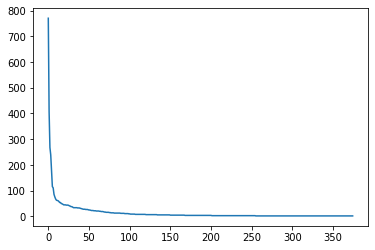

In [47]:
plt.plot(sorted(cluster_n,reverse=True))



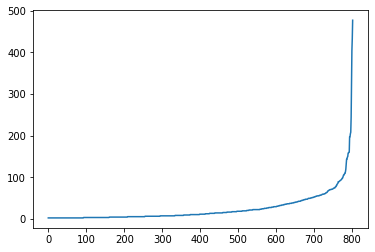

In [45]:
plt.plot(sorted(cluster_n,reverse=True))

In [41]:
24.67372/3407

0.007242066334018198

In [39]:
15.21333/ 2920

0.005210044520547945

In [15]:
v1=[];v2=[]
f=defaultdict();b=defaultdict()
for key ,val in f_O_freq_clusters.items():
    #for freq in 
    #print(list(val.values())[0])
    f[key]=(list(val.values())[0]/2411)
    v1.append(f[key])
for key ,val in b_O_freq_clusters.items():
    #for freq in 
    #print(list(val.values())[0])
    b[key]=(list(val.values())[0]/8830)
    v2.append(b[key])


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


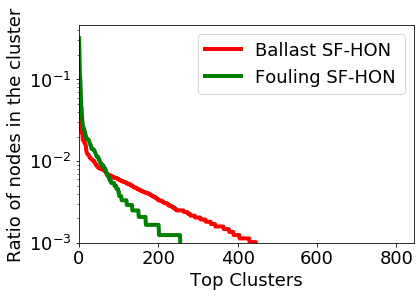

In [16]:
f_size=18
font = {'family' : 'normal',
                'weight' : 'normal',
        'size'   : f_size}
matplotlib.rc('font', **font)
#plt.plot(list(g.values()),list(g.keys() ),color='r')
#plt.legend(loc=2, prop={'size': f_size+10})
#plt.legend()


plt.plot(list(b.keys() ),list(b.values()),color='r',linewidth=4.)
plt.plot(list(f.keys() ),list(f.values()),color='g',linewidth=4.)


#plt.plot(list(f.values()),list(f.keys() ),color='g')
plt.yscale('log',basey=10)
plt.xlabel("Top Clusters",fontsize=f_size)
plt.ylabel("Ratio of nodes in the cluster",fontsize=f_size)
plt.legend(['Ballast SF-HON ','Fouling SF-HON'],fontsize=f_size)
plt.xticks(fontsize=f_size)
plt.yticks(fontsize=f_size)

matplotlib.pyplot.ylim(ymin=0.001)


#matplotlib.pyplot.xlim(xmax=100)
matplotlib.pyplot.xlim(xmin=0)
plt.savefig("data/figs/l_cluster_Histogram2.pdf")


plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


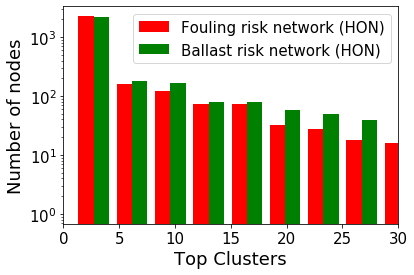

In [17]:
font = {'family' : 'normal',
                'weight' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

#like, freq=20 and value=100: 50 nodes belong to 100 clusters
size1=[];size2=[]
for key,val in f_final_cluster.items():
    size1.append((len(val)))
s1_size=sorted(size1,reverse=True)
for key,val in b_final_cluster.items():
    size2.append((len(val)))
s2_size=sorted(size2,reverse=True)
'''
plt.scatter(s1_size ,color='r')
plt.scatter( s2_size, color='g')

plt.yscale('log',basey=10)
'''

plt.hist([s1_size,s2_size[40:]],color=['r','g'],log=True,bins=200)
matplotlib.pyplot.xlim(xmax=30)
matplotlib.pyplot.xlim(xmin=0)


plt.xlabel("Top Clusters",fontsize=18)
plt.ylabel("Number of nodes",fontsize=18)
plt.legend(['Fouling risk network (HON)','Ballast risk network (HON)'])
plt.savefig("data/figs/l_cluster_Histogram.pdf")
plt.show()



### For the No-Env network (HON)
print(len(set((all_clusters)))): 434 ballast modules in general
print(len(set((all_clusters)))): 114 fouling modules in general


print(len(hon_cluster['1165'])) :165 #number of clusters sinagapore belongs to

new_labels[2613] : [2, 134, 137, 241, 249, 379, 472, 487] #all labels in 
infomap which correspond to cluster '|2613'

print(hon_cluster[21]):[2617, 2996, 3610, 4743, 3199] #clusters port '21|' belongs to (cluster labels based on old port)


ordered_cluster['21|']=4 #contains only the cluster port '21|' belongs to



### For the Env Network (HON)
print(len(set((all_clusters)))): 392 ballast modules in general

print(len(set((all_clusters)))): 68 fouling modules in general
print(len(hon_cluster[1165])): 17 #number of fouling clusters sinagapore belongs to

In [18]:
counter1=0
counter20=0;counter21=0


for item in s1_size:
    if (item>1):
        counter1+=1
for item in s2_size:
    if (item>50):
        counter20+=1
    elif (item> 1):
        counter21+=1

print([counter1,counter1/len(s1_size)], "% of the nodes in the HON frn belong to more than 5 clusters")
print([counter20,counter20/len(s2_size)],"% of the nodes in the HON brn belong to more than 50 clusters")
print([counter21,counter21/len(s2_size)],"% of the nodes in the HON ballast belong to more than 5 clusters")


[1173, 0.40171232876712326] 0.5\% of the nodes in the HON frn belong to more than 5 clusters
[354, 0.10390372761960669] 1.68\% of the nodes in the HON brn belong to more than 50 clusters
[1350, 0.3962430290578221] 18.22\% of the nodes in the HON ballast belong to more than 5 clusters


### Extracted port in a specific cluster

In [19]:
target_ports=defaultdict(dict)
f=open('data/HONet_clusterballast_env_2005_5.txt','r')
for line in f:
    port,clusters=line.split(' ')
    port=int(port)
    clusters=set([int(x) for x in clusters.split(',')])
    other_clusters=[x for x in clusters if x!=2]
    #if clusters=={2}:
    if (2 in clusters and len(clusters)!=1):
        try:
            target_ports[port]['risk']=hon_risks_b[port]            
            target_ports[port]['name']=ports[str(port)]['NAME']            
            target_ports[port]['long']=ports[str(port)]['LONGITUDE_DECIMAL']
            target_ports[port]['lat']=ports[str(port)]['LATITUDE_DECIMAL']
            target_ports[port]['country']=ports[str(port)]['COUNTRY_CODE']
            target_ports[port]['other_clsuters']=other_clusters
        except:
            pass
len(target_ports  )      

175

In [20]:
with open('data/NotOnly_in_C2.csv', 'w') as f:
    for port,vals in target_ports.items():
        f.write(','.join(map(str, [port,vals['name'],vals['long'],vals['lat'],vals['country'],vals['risk']]))+'\n')                                               
print('finished')

finished


### Extract the Top Vulnerable ports in Fouling

In [21]:
for key,val in f_final_cluster.items():
    if ((len(val)>3)and(hon_risks_f[key]>0.7
                        )):
        a=[#ports[str(key)]['NAME'],len(val),hon_risks_f[key],
                               ports[str(key)]['MEOW_realm'],
                              #ports[str(key)]['COUNTRY_CODE']
          ]
        print(' & '.join(map(str, a)))

### Extract the Top Vulnerable ports in Ballast

In [14]:
for key,val in b_final_cluster.items():
    if ((len(val)>3)and(hon_risks_b[key]>0.50)):
        a=[#ports[str(key)]['NAME'],
                               #len(val),
                               #hon_risks_b[key],
                               ports[str(key)]['MEOW_realm']
                              #ports[str(key)]['COUNTRY_CODE']
              ]
        print(' & '.join(map(str, a)))

KeyError: 8992

### Perform regional Analysis

In [22]:
## This function maps the data of a port to the "given" region. So each region has a list of ports with its data
def region_risk(final_cluster,region,port_risk):
    region_dic=country=defaultdict(list)
    counter=0
    for key,val in final_cluster.items():
            try:
                    a={'Name'  :ports[str(key)]['NAME'],
                    'Risk': hon_risks_b[key],
                    'N_clusters':len(val),
                       'Loc':(ports[str(key)]['LONGITUDE_DECIMAL'],ports[str(key)]['LATITUDE_DECIMAL']),
                      'Temp': ports[str(key)]['YR_MEAN_T'],
                       'Sal': ports[str(key)]['Salinity'],
                       'Shipping' : 0,
                       
                      }
                    region_dic[ports[str(key)][region]].append(a)
            except:
                    counter+=1
    print(counter)
    return region_dic

#This function averages the data from the above region_risk dic to get the info for that region.
def get_region_info(region_dic):
    region_info=defaultdict(dict)
    for region in region_dic.keys():
        for port in realm_b[region]:
            N_clusters=[];Risk=[];Temp=[];Sal=[];Long=[];Latt=[];shipping=[]

            N_clusters.append(port['N_clusters'])
            Risk.append(port['Risk'])
            Temp.append(float(port['Temp']))
            Sal.append(float(port['Sal']))
            Long.append(float(port['Loc'][0]))
            Latt.append(float(port['Loc'][1]))
            shipping.append(float(port['Shipping']))

        region_info[region]['N_clusters']=np.mean(N_clusters)
        region_info[region]['Risk']=np.mean(Risk)
        region_info[region]['Temp']=np.mean(Temp)
        region_info[region]['Sal']=np.mean(Sal)
        region_info[region]['Long']=np.mean(Long)
        region_info[region]['Latt']=np.mean(Latt)
        region_info[region]['Shipping']=np.mean(shipping)
    return region_info

### Perform pairwise analysis in regions

In [23]:
#The output of this function can be used to find the correlation of Environmental conditions, shipping, number of 
#clusters with the given risks
#using the region_info dictionary and adjlist risk, it pairs up regions and calculate the corresponding distances
def pair_region_info(region_info,region_adjlist,region_shipping):
    pair_info=defaultdict(list)
    error=1
    for source,targets in region_adjlist.items():
        for target in targets:
            try:
                sal_diff=abs(float(region_info[source]['Sal'])-float(region_info[target]['Sal']))
                temp_diff=abs(float(region_info[source]['Temp'])-float(region_info[target]['Temp']))

                a={'pair_risk': region_adjlist[source][target],
                'env':math.sqrt((temp_diff/2)**2+(sal_diff/10)**2 ),
                   'clusters':np.mean([region_info[source]['N_clusters'],region_info[source]['N_clusters']]),
                   'distance': getDistanceFromLatLonInKm(source,target,region_info),
                     'shipping': region_shipping[source][target]               }
                if(source!=target!='NA'):
                    pair_info[(source,target)]=a
            except:
                error+=1
    print("error:",error)       
    return (pair_info)

def get_factors(pair_info,factor):
    fac=[]
    for pairs,val in pair_info.items():
        fac.append(val[factor])
    return fac

def plot_factors_correlation(factor1,factor2,l1,l2,color,figname):
    from scipy.stats.stats import pearsonr   
    r,p=pearsonr(factor1,factor2)
    print("pearson r value: ",r,"pearson p value: ",p)
    #plt.figure(figsize=(4,3))
    #plt.tight_layout()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_yscale('log')
    plt.scatter(factor1,factor2,color=color,s=50)
    plt.ylabel(l2,fontsize=14)
    plt.xlabel(l1,fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 200)
    #plt.set_yscale('log')
    plt.savefig("data/figs/"+figname+".pdf",dpi = 200)
    plt.show()


    
def deg2rad(deg):
    return deg * (math.pi/180)
def getDistanceFromLatLonInKm(source,dest,region_info):
    #print([lat1,lon1,lat2,lon2])
    R = 6371; # Radius of the earth in km

    lat1=float(region_info[source]['Latt'])
    lon1=float(region_info[source]['Long'])
    lat2=float(region_info[dest]['Latt'])
    lon2=float(region_info[dest]['Long'])
    
    dLat = deg2rad(lat2-lat1)  #deg2rad below
    dLon = deg2rad(lon2-lon1); 
    a =math.sin(dLat/2) * math.sin(dLat/2) +math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c; # Distance in km
    return d;

NameError: name 'shipping_net_region' is not defined

In [25]:
#MEOW_realm adjlist of risk (HON) scaled and nomalized
realm_adjlist_f={'Arctic': {'Arctic': 0.034414606857751516, 'Temp Northern Atlantic': 0.11811363226844429, 'Temp Northern Pacific': 0.003944348982097519}, 'Central Indo-Pacific': {'Central Indo-Pacific': 0.15634894974539312, 'Eastern Indo-Pacific': 0.11430786758972751, 'Temp Australasia': 0.037298095050348444, 'Temp Northern Atlantic': 0.022838226299016277, 'Temp Northern Pacific': 0.056751998846664785, 'Temp South America': 0.034855584077827795, 'Temp Southern Africa': 0.3130063581867437, 'Trop Atlantic': 0.049274871407276065, 'Trop Eastern Pacific': 0.01127514159345744, 'Western Indo-Pacific': 0.10124433815690835}, 'Eastern Indo-Pacific': {'Central Indo-Pacific': 0.5491331531429643, 'Eastern Indo-Pacific': 0.017495201692737963, 'Temp Australasia': 0.006097736745556062, 'Temp Northern Atlantic': 0.005892247751750314, 'Temp Northern Pacific': 0.0085136795281569, 'Temp South America': 0.05344906848367544, 'Trop Eastern Pacific': 0.03847224291273891}, 'Temp Australasia': {'Central Indo-Pacific': 0.013198691205828566, 'Temp Australasia': 0.04252358801527164, 'Temp Northern Atlantic': 0.10171170007653242, 'Temp Northern Pacific': 0.022575197774950987, 'Temp South America': 0.013631920504249433, 'Temp Southern Africa': 0.020271259189092245, 'Western Indo-Pacific': 0.023600463039925888}, 'Temp Northern Atlantic': {'Arctic': 0.025456819843791174, 'Central Indo-Pacific': 0.031728146713685734, 'Eastern Indo-Pacific': 1.0, 'Temp Australasia': 0.012796159144635085, 'Temp Northern Atlantic': 0.06083177293969907, 'Temp Northern Pacific': 0.028858108319055747, 'Temp South America': 0.028727203621968924, 'Temp Southern Africa': 0.044804912685757356, 'Trop Atlantic': 0.04448101585755704, 'Trop Eastern Pacific': 0.010604937419871953, 'Western Indo-Pacific': 0.07490828729217547}, 'Temp Northern Pacific': {'Arctic': 0.006160228195413319, 'Central Indo-Pacific': 0.06912347358025446, 'Temp Australasia': 0.02610365074082765, 'Temp Northern Atlantic': 0.062262835161905734, 'Temp Northern Pacific': 0.07889392531868529, 'Temp South America': 0.03961261927758942, 'Temp Southern Africa': 0.03201899147376797, 'Trop Atlantic': 0.07513712674339289, 'Trop Eastern Pacific': 0.031130702121036514, 'Western Indo-Pacific': 0.0416822247381459}, 'Temp South America': {'Central Indo-Pacific': 0.012971370354130827, 'Eastern Indo-Pacific': 0.010302122471480862, 'Temp Australasia': 0.010767892503642377, 'Temp Northern Atlantic': 0.026227923394310633, 'Temp Northern Pacific': 0.017229627729228477, 'Temp South America': 0.09068617087067472, 'Temp Southern Africa': 0.057812675990480206, 'Trop Atlantic': 0.03975810740391518, 'Trop Eastern Pacific': 0.03533713040111295, 'Western Indo-Pacific': 0.014751497343785955}, 'Temp Southern Africa': {'Central Indo-Pacific': 0.024145872431500747, 'Temp Australasia': 0.00770459531952292, 'Temp Northern Atlantic': 0.11209148162993463, 'Temp Northern Pacific': 0.030682131299359594, 'Temp South America': 0.13011235059643986, 'Temp Southern Africa': 0.09411654981651746, 'Trop Atlantic': 0.018752898565531348, 'Trop Eastern Pacific': 0.08260388796943298, 'Western Indo-Pacific': 0.054871343906964194}, 'Trop Atlantic': {'Central Indo-Pacific': 0.04844610242023195, 'Eastern Indo-Pacific': 0.036093066775079376, 'Temp Northern Atlantic': 0.02315354500069328, 'Temp Northern Pacific': 0.003834307905236517, 'Temp South America': 0.04375619901670017, 'Temp Southern Africa': 0.03527937220080642, 'Trop Atlantic': 0.09187508842939883, 'Trop Eastern Pacific': 0.08894910489785299, 'Western Indo-Pacific': 0.1575970445607111}, 'Trop Eastern Pacific': {'Central Indo-Pacific': 0.16251526899384683, 'Eastern Indo-Pacific': 0.2225689524150998, 'Temp Northern Pacific': 0.03704526254049841, 'Temp South America': 0.014033060419670602, 'Temp Southern Africa': 0.023313880990239736, 'Trop Atlantic': 0.13597210961852557, 'Trop Eastern Pacific': 0.08350049127776864}, 'Western Indo-Pacific': {'Central Indo-Pacific': 0.1432434426784798, 'Eastern Indo-Pacific': 0.018631076969160106, 'Temp Australasia': 0.01405750061907041, 'Temp Northern Atlantic': 0.10395042424747707, 'Temp Northern Pacific': 0.028327873695357796, 'Temp South America': 0.02041610335702964, 'Temp Southern Africa': 0.05906938682069914, 'Trop Atlantic': 0.13837704218549934, 'Western Indo-Pacific': 0.16493892689093528}}

In [26]:
#MEOW_province adjlist of risk (HON)
region_adjlist={'South Kuroshio': {'Cold Temperate Northwest Pacific': 0.00018393905076514503, 'Sunda Shelf': 0.052506288403914358, 'South China Sea': 0.036094777568749306, 'Northeast Australian Shelf': 0.61565686403097464, 'East Central Australian Shelf': 0.0051026276067493844, 'Western Coral Triangle': 0.016939313272910705, 'Warm Temperate Northwest Pacific': 0.00075591937104431178}, 'South China Sea': {'South Kuroshio': 0.011446094271132495, 'South China Sea': 0.023534566808353773, 'West Central Australian Shelf': 0.098447006997419748, 'Tropical East Pacific': 0.003294358672565095, 'Western Coral Triangle': 0.035788533731984984, 'Northwest Australian Shelf': 0.23912679029972553, 'Sunda Shelf': 0.018664951189602069, 'Central Polynesia': 0.00055658267927899473, 'Andaman': 0.0031404249791982218, 'Southwest Australian Shelf': 0.028666024437976598, 'Tropical Southwestern Pacific': 0.0018385130033086929, 'Mediterranean Sea': 0.049845731233882362, 'Central Indian Ocean Islands': 0.00038520166462297265, 'Bay of Bengal': 0.052250350319769032, 'Gulf of Guinea': 0.038201085274671753, 'Tropical Southwestern Atlantic': 0.16989584330056162, 'Warm Temperate Northwest Pacific': 0.0092163859158524517, 'East Central Australian Shelf': 0.03550494503176696, 'Somali/Arabian': 0.033270208898840435, 'Warm Temperate Southwestern Atlantic': 0.029626094170662032, 'Sahul Shelf': 0.075214828720339189, 'Warm Temperate Northwest Atlantic': 0.059337710022008473, 'Red Sea and Gulf of Aden': 0.0098289824495880716, 'Hawaii': 0.098028984152632476, 'Southern New Zealand': 0.0001637051562290371, 'Agulhas': 0.20971722770179801, 'Tropical Northwestern Pacific': 0.00030440631749147388, 'West and South Indian Shelf': 0.013830805593227627, 'Warm Temperate Southeastern Pacific': 0.025041947148854968, 'Warm Temperate Northeast Pacific': 0.0087009700194208475, 'Eastern Coral Triangle': 0.024936021301453323, 'Tropical Northwestern Atlantic': 0.014950550603943043, 'Java Transitional': 0.040321138385343139, 'Lusitanian': 0.00014270552781863491, 'Southeast Polynesia': 0.001180299166177041, 'Northeast Australian Shelf': 0.231322186217606, 'Cold Temperate Northwest Pacific': 0.0064545941647393976, 'Benguela': 0.0001211014411217766, 'Southeast Australian Shelf': 0.015893039908228403, 'Northern New Zealand': 0.018659529084361366, 'Western Indian Ocean': 0.060487672893943911}, 'West Central Australian Shelf': {'Warm Temperate Southwestern Atlantic': 0.12465197188907018, 'Lusitanian': 0.0046894815170154397, 'Sunda Shelf': 0.0033795353520501012, 'South China Sea': 0.045736926736032905, 'Agulhas': 0.18231755985147624, 'Sahul Shelf': 0.0048405892647662664, 'East Central Australian Shelf': 0.0018156702071079015, 'Northwest Australian Shelf': 0.0020723937617449593, 'West and South Indian Shelf': 0.0017580773998195354, 'Red Sea and Gulf of Aden': 0.0016216562377854224, 'Warm Temperate Northwest Pacific': 0.014679829663870487, 'Southwest Australian Shelf': 0.12890436461309604, 'Cold Temperate Northwest Pacific': 0.0035243248727334486, 'Java Transitional': 0.0025303965102268697, 'Northeast Australian Shelf': 0.15028119873971699, 'Mediterranean Sea': 0.35236284415878394, 'Southeast Australian Shelf': 0.0044731178885362207, 'Cold Temperate Northeast Pacific': 0.00021072322933763244, 'Benguela': 0.0051898948484347092, 'Western Coral Triangle': 0.0059505378488514801, 'Somali/Arabian': 0.051408942939455325}, 'Tropical East Pacific': {'Warm Temperate Southwestern Atlantic': 0.004741557001355986, 'Warm Temperate Northwest Atlantic': 0.0020587101658579902, 'Hawaii': 0.035319341782323342, 'South China Sea': 0.0023198360612719103, 'Agulhas': 0.080513065395610386, 'Sunda Shelf': 0.25883857271106947, 'East Central Australian Shelf': 0.00016321454513038071, 'Northwest Australian Shelf': 0.56315213533223085, 'Tropical East Pacific': 0.036016744826036812, 'Warm Temperate Southeastern Pacific': 0.016423720887391878, 'Warm Temperate Northeast Pacific': 0.013833281150000364, 'Warm Temperate Northwest Pacific': 0.010145308982958569, 'Cold Temperate Northwest Pacific': 0.00023252642306526139, 'Tropical Northwestern Atlantic': 0.039427404685942982, 'Southeast Polynesia': 0.0042462085515756276, 'Northeast Australian Shelf': 0.093899660604160315, 'Gulf of Guinea': 0.00023416078186296136, 'Tropical Southwestern Atlantic': 0.00062550746792428035, 'Red Sea and Gulf of Aden': 0.00057609118695804652, 'Western Coral Triangle': 0.0089867132528087292, 'North Brazil Shelf': 0.012169582685157264}, 'Western Coral Triangle': {'South Kuroshio': 0.0029970926475460726, 'South China Sea': 0.033425725210184436, 'West Central Australian Shelf': 0.0013928910082586098, 'Tropical East Pacific': 0.004951505580728475, 'Western Coral Triangle': 0.016492174473868509, 'Northwest Australian Shelf': 0.3918741581279569, 'Andaman': 0.11248488144048155, 'Warm Temperate Northwest Pacific': 0.021814879998493467, 'Southwest Australian Shelf': 0.00051189806232374545, 'Tropical Southwestern Pacific': 0.00032224641916432553, 'Central Indian Ocean Islands': 0.001265605796629346, 'Bay of Bengal': 0.14343473806266024, 'Sunda Shelf': 0.033230825830790844, 'Tropical Southwestern Atlantic': 0.55495798267139518, 'Lusitanian': 0.045083232372696354, 'Somali/Arabian': 0.071794643212349823, 'Warm Temperate Southwestern Atlantic': 0.0024943364357725385, 'Sahul Shelf': 0.26511712766338996, 'Red Sea and Gulf of Aden': 0.14469381171864654, 'Hawaii': 0.081750674812533536, 'Agulhas': 0.068916795066992789, 'Tropical Northwestern Pacific': 0.00085245765202146594, 'West and South Indian Shelf': 0.10628956096967507, 'Warm Temperate Northeast Pacific': 0.00016203303858781031, 'Central Polynesia': 0.0022313189187562108, 'Eastern Coral Triangle': 0.018709902338213898, 'Java Transitional': 0.036415538795510891, 'Southeast Polynesia': 0.0010456309444344327, 'Northeast Australian Shelf': 0.089692239124350176, 'Mediterranean Sea': 0.0068209502513263071, 'East Central Australian Shelf': 0.00066596847169058217, 'Western Indian Ocean': 0.14968505892166778}, 'Andaman': {'Warm Temperate Northwest Atlantic': 0.00073373474309727685, 'Sunda Shelf': 0.018375987811365197, 'Somali/Arabian': 0.19471564901282479, 'Agulhas': 0.012465315141186938, 'Western Coral Triangle': 0.055641432965310156, 'West and South Indian Shelf': 0.068211701508627154, 'Andaman': 0.033430560380845797, 'Java Transitional': 0.013176863430428329, 'Central Indian Ocean Islands': 0.10479700886494568, 'Bay of Bengal': 0.025360835958727294, 'Mediterranean Sea': 0.00031908643562477941, 'Cold Temperate Northwest Atlantic': 0.0090616206688221117, 'Western Indian Ocean': 0.0027976649217202093, 'South China Sea': 0.024669663709476937}, 'Warm Temperate Southeastern Pacific': {'South China Sea': 0.021522067605084124, 'Southeast Australian Shelf': 0.16027301007163577, 'Warm Temperate Northwest Pacific': 0.10831466400675538, 'Southwest Australian Shelf': 0.0032345844938776024, 'Cold Temperate Northwest Atlantic': 0.0021759167664014353, 'Gulf of Guinea': 0.0015058632276415385, 'Hawaii': 0.0010994183135699088, 'Lusitanian': 0.041475334300480504, 'Magellanic': 0.02709190497301767, 'Warm Temperate Southwestern Atlantic': 0.019091915713536099, 'Cold Temperate Northeast Pacific': 0.0013680418693669451, 'Sunda Shelf': 0.0012481193055218975, 'Agulhas': 0.0027344241369489236, 'Tropical East Pacific': 0.010697612599913069, 'Warm Temperate Southeastern Pacific': 0.052387245672590774, 'Warm Temperate Northeast Pacific': 0.027060320458701454, 'Northern European Seas': 0.0068428391643270657, 'Tropical Northwestern Atlantic': 0.00013046299661053216, 'Cold Temperate Northwest Pacific': 0.16336952327694471, 'Northeast Australian Shelf': 0.001123845560636189, 'Mediterranean Sea': 0.062427614521901278, 'Benguela': 0.081719261109442914}, 'Tropical Southwestern Pacific': {'Sunda Shelf': 0.012543700440553638, 'Marshall, Gilbert and Ellis Islands': 0.00014281343048501907, 'Western Coral Triangle': 0.0054557812145422865, 'Tropical East Pacific': 0.0017330880717293295, 'Central Polynesia': 0.0084052205258907352, 'Warm Temperate Northwest Pacific': 0.0012924183580831428, 'Eastern Coral Triangle': 0.037647365498426962, 'Tropical Southwestern Pacific': 0.0094492484363702858, 'Southeast Polynesia': 0.050616794324905408, 'Northeast Australian Shelf': 0.0037186384484784521, 'East Central Australian Shelf': 0.0010057610208421654, 'Northern New Zealand': 0.00017817239933343439}, 'Gulf of Guinea': {'Warm Temperate Southwestern Atlantic': 0.015276556474392404, 'NA': 0.052080856433483494, 'Somali/Arabian': 0.015401284876054426, 'Western Coral Triangle': 0.042642582001728484, 'Warm Temperate Northwest Atlantic': 0.010976020214562196, 'Bay of Bengal': 0.072136397972278665, 'Gulf of Guinea': 0.026122046285243273, 'Sunda Shelf': 0.056525964478401837, 'Tropical Southwestern Atlantic': 0.063058896539442674, 'Lusitanian': 0.0033215335244984232, 'South China Sea': 0.030784225635700019, 'West African Transition': 0.023738283625492969, 'North Brazil Shelf': 0.056636421649373325, 'Red Sea and Gulf of Aden': 0.0062758939749705499, 'Hawaii': 0.043598967927039607, 'Agulhas': 0.03215020843641208, 'West and South Indian Shelf': 0.043476809590330387, 'Warm Temperate Southeastern Pacific': 0.00024878867018093197, 'Warm Temperate Northeast Pacific': 0.0010517363061441608, 'Tropical Northwestern Atlantic': 0.034527928202272441, 'Mediterranean Sea': 0.003888579249843272, 'Western Indian Ocean': 0.024218470220811642}, 'Magellanic': {'Warm Temperate Southwestern Atlantic': 0.024671324355845722, 'Cold Temperate Northwest Pacific': 0.27508431463266653, 'Mediterranean Sea': 0.035301984746390819, 'Magellanic': 0.0029276272217910832, 'Lusitanian': 0.0026397910362693962, 'Warm Temperate Southeastern Pacific': 0.02171745801675452, 'Warm Temperate Northeast Pacific': 0.0010262838854143482, 'Warm Temperate Northwest Pacific': 0.019366069805358002}, 'Tropical Southwestern Atlantic': {'Warm Temperate Southwestern Atlantic': 0.010393401846743726, 'NA': 0.011904600263946274, 'South China Sea': 0.26402638051577548, 'Tropical East Pacific': 0.1149839755121623, 'Western Coral Triangle': 0.26675695644239655, 'Northwest Australian Shelf': 0.66397902100390616, 'Warm Temperate Northwest Atlantic': 0.0066083543300656409, 'Warm Temperate Northwest Pacific': 0.002890497682828925, 'Bay of Bengal': 0.069405246894308215, 'Gulf of Guinea': 0.029633262346183787, 'Tropical Southwestern Atlantic': 0.027964561474622691, 'Lusitanian': 0.0077480660608299457, 'Somali/Arabian': 0.35391503108993116, 'West African Transition': 0.0065890965488896057, 'North Brazil Shelf': 0.044040776943805163, 'Red Sea and Gulf of Aden': 0.0053432372289466375, 'Sunda Shelf': 0.20216761950013998, 'Agulhas': 0.13572768202792412, 'West and South Indian Shelf': 0.085368767389691597, 'Warm Temperate Northeast Pacific': 0.0015016470559227866, 'Tropical Northwestern Atlantic': 0.048002972165457188, 'Java Transitional': 0.087445409150091524, 'Northeast Australian Shelf': 0.53070997257264196, 'Mediterranean Sea': 0.017803065092110604, 'East Central Australian Shelf': 0.0031443626632977526, 'Western Indian Ocean': 0.01015563961127707}, 'Cold Temperate Northeast Pacific': {'Warm Temperate Southwestern Atlantic': 0.0021073192931816637, 'Warm Temperate Northwest Atlantic': 0.0031453284380413664, 'NA': 0.0024094938243268177, 'Southern New Zealand': 0.14894682703045545, 'Cold Temperate Northwest Pacific': 0.07955779034338202, 'East Central Australian Shelf': 0.00021977951236720389, 'Tropical East Pacific': 0.00013744292065781511, 'Arctic': 0.00067592518685459654, 'Warm Temperate Northeast Pacific': 0.0023823712601045745, 'Warm Temperate Northwest Pacific': 0.012496726515492338, 'Southwest Australian Shelf': 0.0084592368116332417, 'Northern European Seas': 0.64243335500975673, 'Cold Temperate Northwest Atlantic': 0.05113330480402508, 'Lusitanian': 0.053164982678462411, 'Warm Temperate Southeastern Pacific': 0.017987295350683802, 'Mediterranean Sea': 0.0009022972012312936, 'Magellanic': 0.0086787704515704379, 'Cold Temperate Northeast Pacific': 0.01300702155031048, 'Southeast Australian Shelf': 0.035097458218512172, 'Northern New Zealand': 0.012123035876291434}, 'Warm Temperate Southwestern Atlantic': {'Warm Temperate Southwestern Atlantic': 0.014565015721040889, 'NA': 0.00013084881497407887, 'South China Sea': 0.13052412598932073, 'Tropical East Pacific': 0.0027173196564289495, 'East Central Australian Shelf': 0.0047987559293648143, 'Mediterranean Sea': 0.029018834278902218, 'Warm Temperate Northwest Atlantic': 0.027569975175651424, 'Red Sea and Gulf of Aden': 0.0050208288938651405, 'Andaman': 0.00027177284294913978, 'Southwest Australian Shelf': 0.024038561539957422, 'Cold Temperate Northwest Atlantic': 0.0079767112159207804, 'Bay of Bengal': 0.020866222154162662, 'Magellanic': 0.02144104634497928, 'Gulf of Guinea': 0.0070819490691514404, 'Tropical Southwestern Atlantic': 0.011401725540351636, 'Warm Temperate Northwest Pacific': 0.04095892731931753, 'Somali/Arabian': 0.055581633181665729, 'West African Transition': 0.01836115166177011, 'North Brazil Shelf': 0.010080201855872703, 'Lusitanian': 0.050653468273866423, 'Sunda Shelf': 0.014717347148963431, 'Agulhas': 0.023857673683726651, 'Cold Temperate Northeast Pacific': 0.059834438151944835, 'West and South Indian Shelf': 0.0053370737000050369, 'Warm Temperate Southeastern Pacific': 0.032458441469060413, 'Warm Temperate Northeast Pacific': 0.0024967278710713759, 'Northern European Seas': 0.0012998119408703466, 'Tropical Northwestern Atlantic': 0.013971762117282346, 'Java Transitional': 0.0083235623179641754, 'Northeast Australian Shelf': 0.22809390964384854, 'Cold Temperate Northwest Pacific': 0.04880099290764741, 'Benguela': 0.067525034221351934, 'Western Coral Triangle': 0.012110704500160947, 'Northern New Zealand': 0.047120115195019241, 'Western Indian Ocean': 0.0010661219971060969}, 'Warm Temperate Northwest Atlantic': {'Warm Temperate Southwestern Atlantic': 0.039776611877753373, 'NA': 0.0017320640408498538, 'South China Sea': 0.058626368437372713, 'East Central Australian Shelf': 0.0031440630671925218, 'Warm Temperate Northwest Atlantic': 0.031823816732597598, 'Warm Temperate Northwest Pacific': 0.04475377764744197, 'Southwest Australian Shelf': 0.00026762794951894789, 'Cold Temperate Northwest Atlantic': 0.0082798181085063285, 'Bay of Bengal': 0.00098845169414286818, 'Gulf of Guinea': 0.0076723779587364298, 'Sunda Shelf': 0.0051156343627903307, 'Tropical Southwestern Atlantic': 0.017331494537757307, 'Lusitanian': 0.031770849538083117, 'Somali/Arabian': 0.055527806695891545, 'West African Transition': 0.032777754873240056, 'North Brazil Shelf': 0.0028581820312700125, 'Red Sea and Gulf of Aden': 0.012938350996498449, 'Hawaii': 0.042924069514137797, 'Agulhas': 0.027762649891594569, 'Tropical East Pacific': 0.00062318857893573474, 'Warm Temperate Southeastern Pacific': 0.042224190900604343, 'Warm Temperate Northeast Pacific': 0.0079704357553832192, 'Cold Temperate Northwest Pacific': 0.0015732426675570694, 'Tropical Northwestern Atlantic': 0.01003074568343401, 'Mediterranean Sea': 0.03712895231907317, 'Black Sea': 0.00031380712662066804, 'Benguela': 0.011024077516438024, 'Western Indian Ocean': 0.0060662748587722339}, 'Lusitanian': {'Warm Temperate Southwestern Atlantic': 0.043062945557028602, 'NA': 0.0013393580619471173, 'South China Sea': 0.0024047614658354389, 'Southeast Australian Shelf': 0.0012370321909050759, 'Warm Temperate Northwest Atlantic': 0.030706481102267268, 'Warm Temperate Northwest Pacific': 0.08491131395313678, 'Southwest Australian Shelf': 0.14012404911545726, 'Cold Temperate Northwest Atlantic': 0.092017107619565192, 'Gulf of Guinea': 0.0010014477643093722, 'Magellanic': 0.0052818259762129824, 'Tropical Southwestern Atlantic': 0.0080004701107386118, 'Lusitanian': 0.016724715224916809, 'Somali/Arabian': 0.027636022312225256, 'West African Transition': 0.0087421614965529325, 'North Brazil Shelf': 0.00036977088744625082, 'Red Sea and Gulf of Aden': 0.031409427912541338, 'Sunda Shelf': 0.00056564353379921892, 'Southern New Zealand': 0.0080642902974985761, 'Agulhas': 0.012322383139325675, 'Warm Temperate Southeastern Pacific': 0.0038974479652962748, 'Cold Temperate Northwest Pacific': 0.31025668548981433, 'Tropical Northwestern Atlantic': 0.01002490806398083, 'St. Helena and Ascension Islands': 0.00043720644291405015, 'Mediterranean Sea': 0.031808350646898222, 'Northern European Seas': 0.0037800154840523866, 'Black Sea': 0.0078316672605911412, 'Benguela': 0.078027325460138075, 'Northern New Zealand': 0.0075906256215660601, 'Western Indian Ocean': 0.0032794373154058213}, 'Agulhas': {'Warm Temperate Southwestern Atlantic': 0.026502056420484737, 'Somali/Arabian': 0.048772205798640715, 'Tropical East Pacific': 0.001592270279050379, 'Western Coral Triangle': 0.024308060319700855, 'Northwest Australian Shelf': 0.004904560516797149, 'Warm Temperate Northwest Atlantic': 0.050943979365057131, 'Warm Temperate Northwest Pacific': 0.040510502832132318, 'Southwest Australian Shelf': 0.039529292557359874, 'Cold Temperate Northwest Atlantic': 0.002113624488277387, 'Bay of Bengal': 0.019238361744424025, 'Gulf of Guinea': 0.036698144175872416, 'Tropical Southwestern Atlantic': 0.15193110891334857, 'Red Sea and Gulf of Aden': 0.038071885614096468, 'South China Sea': 0.1169658510696451, 'West African Transition': 0.083374768405989799, 'North Brazil Shelf': 0.0065960371817804057, 'Lusitanian': 0.044250140077627398, 'Sunda Shelf': 0.017168929817475014, 'Agulhas': 0.013655167972345486, 'West and South Indian Shelf': 0.044032585321863153, 'Warm Temperate Southeastern Pacific': 0.041548222595436057, 'Warm Temperate Northeast Pacific': 0.00090325345708775319, 'Cold Temperate Northwest Pacific': 0.01924712550420429, 'Tropical Northwestern Atlantic': 0.062530946801962292, 'Java Transitional': 0.0038647779357824622, 'Northeast Australian Shelf': 0.0078930824067835921, 'Mediterranean Sea': 0.077532071971672167, 'Benguela': 0.0040004909237117241, 'Western Indian Ocean': 0.032258352988006576}, 'Tropical Northwestern Pacific': {'South Kuroshio': 0.010849525108470721, 'Eastern Coral Triangle': 0.014513490108523232, 'Sunda Shelf': 0.012402048983170049, 'South China Sea': 0.00069010747766650425, 'Tropical Northwestern Pacific': 0.0025017055973046379, 'Western Coral Triangle': 0.0016829842704900206, 'Tropical East Pacific': 0.00016327490348811663, 'East Central Australian Shelf': 0.00015180311662442555, 'Warm Temperate Northwest Pacific': 0.0012918647737499233}, 'Southeast Australian Shelf': {'Cold Temperate Northeast Pacific': 0.029783922063828759, 'Southern New Zealand': 0.011228225825412289, 'Agulhas': 0.00062462942303916774, 'Southeast Australian Shelf': 0.029828580481024543, 'Warm Temperate Northwest Pacific': 0.09570119468559718, 'Southwest Australian Shelf': 0.011472073683248958, 'Cold Temperate Northwest Pacific': 0.14650947937330969, 'Northeast Australian Shelf': 0.0001791486516050405, 'Red Sea and Gulf of Aden': 0.00017212275472668163, 'Benguela': 0.0016639032131616086, 'East Central Australian Shelf': 0.014516287994398514, 'Northern New Zealand': 0.01922959150426521}, 'Sahul Shelf': {'Sunda Shelf': 0.13872127761725764, 'Somali/Arabian': 0.07755950505800098, 'Sahul Shelf': 0.022152180900242298, 'Western Coral Triangle': 0.11035587753796884, 'Northwest Australian Shelf': 0.076494883676253039, 'West and South Indian Shelf': 0.37781475052640018, 'Central Polynesia': 0.0060892465983093018, 'Warm Temperate Northeast Pacific': 0.00018146287069294964, 'Southwest Australian Shelf': 0.00041437495713762438, 'Eastern Coral Triangle': 0.034335701593890509, 'Tropical Southwestern Pacific': 0.060013977728533362, 'Java Transitional': 0.034795135306894737, 'Southeast Polynesia': 0.010599944368557884, 'Northeast Australian Shelf': 0.067487291374639741, 'Mediterranean Sea': 0.0094566733389296297, 'Bay of Bengal': 0.33396077384034378, 'Hawaii': 0.12119133648177283, 'Red Sea and Gulf of Aden': 0.26707006701324654, 'East Central Australian Shelf': 0.0021449478751742203, 'South China Sea': 0.050352002374559481}, 'Arctic': {'Northern European Seas': 0.0024910420278769162, 'Cold Temperate Northwest Atlantic': 0.0058194131255869374, 'Arctic': 0.039843586422476339}, 'Central Polynesia': {'Eastern Coral Triangle': 0.0011520780055603377, 'Tropical Southwestern Pacific': 0.0015650674106443571, 'Hawaii': 0.00049453260028761237, 'Southeast Polynesia': 0.12891815172641266, 'Northeast Australian Shelf': 0.00036806360476888007, 'Tropical Northwestern Pacific': 0.0034472531341841394, 'Gulf of Guinea': 0.0033907566036711486, 'Sunda Shelf': 0.0045289513482321842, 'South China Sea': 0.00059084406489657659}, 'Northern European Seas': {'Warm Temperate Southwestern Atlantic': 0.0058861256557062635, 'NA': 0.025130723142124597, 'Warm Temperate Northwest Pacific': 0.003970161415571531, 'Northern European Seas': 0.0058676867673715946, 'Southeast Australian Shelf': 0.0030192298181780991, 'Warm Temperate Southeastern Pacific': 0.00023897134058908435, 'Warm Temperate Northeast Pacific': 0.00035760354902562857, 'Arctic': 0.0028391073896953589, 'Cold Temperate Northwest Pacific': 0.047622913298894204, 'Cold Temperate Northwest Atlantic': 0.014344594101538691, 'Black Sea': 0.00072102597354553046, 'Mediterranean Sea': 0.0011279780505087705, 'Magellanic': 0.00010029407990296067, 'Lusitanian': 0.0022703953113799831, 'Benguela': 0.0011666078911883981}, 'Tropical Northwestern Atlantic': {'Warm Temperate Southwestern Atlantic': 0.0087316297505989834, 'NA': 0.036375076899237253, 'South China Sea': 0.0087832927397206492, 'Tropical East Pacific': 0.034059754517531265, 'East Central Australian Shelf': 0.0011787684844286868, 'Northwest Australian Shelf': 0.34014887027961521, 'Warm Temperate Northwest Atlantic': 0.0090799615920292738, 'Warm Temperate Northwest Pacific': 0.00031872778011555889, 'Southwest Australian Shelf': 0.00010858746180942803, 'Cold Temperate Northwest Atlantic': 0.024474579481603701, 'Bay of Bengal': 0.0013930738429103163, 'Gulf of Guinea': 0.038503014617469238, 'Hawaii': 0.011229176520044227, 'Tropical Southwestern Atlantic': 0.069845091361136452, 'Red Sea and Gulf of Aden': 0.012243696733179895, 'Somali/Arabian': 0.03797432599040651, 'West African Transition': 0.021457097082198062, 'North Brazil Shelf': 0.020775210551157289, 'Lusitanian': 0.0019005119195904074, 'Sunda Shelf': 0.10833858989650794, 'Agulhas': 0.037456071937738512, 'West and South Indian Shelf': 0.068928731833333673, 'Warm Temperate Southeastern Pacific': 0.0031038204098310651, 'Warm Temperate Northeast Pacific': 0.15432352555072035, 'Eastern Coral Triangle': 0.00092767182280015562, 'Tropical Northwestern Atlantic': 0.023788156736118907, 'Southeast Polynesia': 0.0030443115240368647, 'Mediterranean Sea': 0.0036192270108052799, 'Western Indian Ocean': 0.00076644352139386722}, 'Tristan Gough': {'Benguela': 0.0057009079244338939}, 'Southeast Polynesia': {'Sunda Shelf': 0.0085122750520377783, 'South China Sea': 0.0033889877809802366, 'Sahul Shelf': 0.0099175989459424317, 'East Central Australian Shelf': 0.0004074225631060691, 'Tropical East Pacific': 0.0006150407036337761, 'Central Polynesia': 0.0027807448330521827, 'Warm Temperate Northeast Pacific': 0.00028783771801144369, 'Eastern Coral Triangle': 0.014343218536797021, 'Tropical Southwestern Pacific': 0.044903508279434186, 'Southeast Polynesia': 0.00030959471812998566, 'Northeast Australian Shelf': 0.0001374850324148747, 'Hawaii': 0.00039264191375211536, 'Tropical Northwestern Atlantic': 0.0019344795614769919}, 'East Central Australian Shelf': {'South Kuroshio': 0.0054742712955827052, 'Tropical East Pacific': 0.00033289846229194749, 'South China Sea': 0.021353825316620199, 'West and South Indian Shelf': 0.00012777679792522775, 'Southeast Australian Shelf': 0.0057016727865468976, 'Northwest Australian Shelf': 0.0017362907680821276, 'Red Sea and Gulf of Aden': 0.00030006349253586815, 'Warm Temperate Northwest Pacific': 0.10989534438767287, 'Southwest Australian Shelf': 0.094418108247859261, 'Tropical Southwestern Pacific': 0.00077561454308420347, 'Java Transitional': 0.00049727301863849505, 'Gulf of Guinea': 0.0014169481597698468, 'Hawaii': 0.024728913079194129, 'Tropical Southwestern Atlantic': 0.0038736659894389003, 'Cold Temperate Northeast Pacific': 0.00013473985901627471, 'East Central Australian Shelf': 0.027315354698205153, 'Somali/Arabian': 0.01628006673513378, 'Warm Temperate Southwestern Atlantic': 0.090920923565426817, 'North Brazil Shelf': 0.00039981564086114375, 'Lusitanian': 0.12695822332242515, 'Sunda Shelf': 0.0011506890426007535, 'Southern New Zealand': 0.0016162074540948053, 'Agulhas': 0.0081469761290571593, 'Sahul Shelf': 0.0014750194238963422, 'Warm Temperate Southeastern Pacific': 0.04776389684126741, 'Warm Temperate Northeast Pacific': 0.11303716896465683, 'Eastern Coral Triangle': 0.00056677490384692724, 'Cold Temperate Northwest Pacific': 0.09776204927603685, 'Southeast Polynesia': 0.00059498391859572563, 'Northeast Australian Shelf': 0.015476840777611509, 'Mediterranean Sea': 0.064933981045517286, 'Northern European Seas': 0.00014178762449287721, 'Benguela': 0.0057742099818687397, 'Western Coral Triangle': 0.00022109061122509, 'Northern New Zealand': 0.0099670403784952073}, 'Northern New Zealand': {'South China Sea': 0.013658758509280019, 'Southern New Zealand': 0.017241796570075033, 'Southeast Australian Shelf': 0.01371801463352103, 'Warm Temperate Southeastern Pacific': 0.0078515903593486432, 'Warm Temperate Northeast Pacific': 0.0085731564282648439, 'Warm Temperate Northwest Pacific': 0.059074547532060526, 'Southwest Australian Shelf': 0.064497820304120379, 'Cold Temperate Northwest Pacific': 0.032412027416684905, 'Tropical Southwestern Pacific': 0.00047417978754661443, 'Northeast Australian Shelf': 0.0040812557687905631, 'Cold Temperate Northeast Pacific': 0.00044632116084640375, 'East Central Australian Shelf': 0.013905363481480608}, 'Western Indian Ocean': {'South China Sea': 0.065158156520819369, 'Andaman': 0.067217975366391763, 'Warm Temperate Northwest Pacific': 0.00062230025515262028, 'Southwest Australian Shelf': 0.0034238696511964596, 'Warm Temperate Northwest Atlantic': 0.0039320860749056871, 'Bay of Bengal': 0.027223525356576482, 'Gulf of Guinea': 0.020446248161655224, 'Tropical Southwestern Atlantic': 0.10768853120705317, 'Lusitanian': 0.0034872183747900148, 'Somali/Arabian': 0.0060923239039959842, 'Warm Temperate Southwestern Atlantic': 0.063551634665998905, 'North Brazil Shelf': 0.00032853918661110529, 'Red Sea and Gulf of Aden': 0.015503311650050401, 'Sunda Shelf': 0.050965954496649001, 'Agulhas': 0.045173059064623745, 'West and South Indian Shelf': 0.021556206771949707, 'Tropical Northwestern Atlantic': 0.1211287592874658, 'Java Transitional': 0.079497100718288805, 'Northeast Australian Shelf': 0.00051298532745179298, 'Mediterranean Sea': 0.015306530562518683, 'Benguela': 0.004344627418160032, 'Western Indian Ocean': 0.02228927459143961}, 'NA': {'Warm Temperate Southwestern Atlantic': 0.00012145097526448457, 'Warm Temperate Northwest Atlantic': 0.0070390156364726619, 'NA': 0.13699784893731348, 'Agulhas': 0.00010664851026422649, 'North Brazil Shelf': 0.14692385444724437, 'Cold Temperate Northwest Pacific': 0.00015143734469314125, 'Tropical Northwestern Atlantic': 0.00098626231566154542, 'Cold Temperate Northwest Atlantic': 0.080576799415283298, 'Mediterranean Sea': 0.00024774095547313755, 'Northern European Seas': 0.029147097394041279, 'Tropical Southwestern Atlantic': 0.0005467560159017784, 'Black Sea': 0.003261345265551747}, 'Somali/Arabian': {'South Kuroshio': 0.061519828767513204, 'Somali/Arabian': 0.027115238797075406, 'West Central Australian Shelf': 0.019923029184805069, 'West and South Indian Shelf': 0.06466770814151683, 'Western Coral Triangle': 0.024312267853563149, 'Northwest Australian Shelf': 0.020155436411688009, 'Andaman': 0.0042403004697717942, 'Warm Temperate Northwest Pacific': 0.011627864573665783, 'Southwest Australian Shelf': 0.011058811353721089, 'Tropical Southwestern Pacific': 0.0013253700035961856, 'Central Indian Ocean Islands': 0.0065811414927681834, 'Bay of Bengal': 0.058110010153231584, 'Gulf of Guinea': 0.061312944753529781, 'Hawaii': 0.031904176131084303, 'Tropical Southwestern Atlantic': 0.34435212103966695, 'Lusitanian': 0.044785422981130418, 'South China Sea': 0.022203098315774501, 'Warm Temperate Southwestern Atlantic': 0.065940103803505651, 'Warm Temperate Northwest Atlantic': 0.040536222533473852, 'Red Sea and Gulf of Aden': 0.030280217268858208, 'Sunda Shelf': 0.037865337009203796, 'Agulhas': 0.076988612389899055, 'Tropical Northwestern Pacific': 0.012148720203002858, 'Sahul Shelf': 0.28590614358942834, 'Warm Temperate Northeast Pacific': 0.0060189396626188331, 'Cold Temperate Northwest Pacific': 0.00024498125638978957, 'Tropical Northwestern Atlantic': 0.049197705369670004, 'Java Transitional': 0.016321257669742475, 'North Brazil Shelf': 0.0087637333279580731, 'Northeast Australian Shelf': 0.31864266602076668, 'Mediterranean Sea': 0.023540800346519293, 'East Central Australian Shelf': 0.011688845593749364, 'Western Indian Ocean': 0.051153022022416873}, 'Easter Island': {'Southeast Polynesia': 0.00050932631383821154, 'Warm Temperate Southeastern Pacific': 0.00046003843395020554}, 'Northwest Australian Shelf': {'South China Sea': 0.18828068160168876, 'West Central Australian Shelf': 0.040369694020863357, 'West and South Indian Shelf': 0.24203558391397931, 'East Central Australian Shelf': 0.0018986550329872715, 'Red Sea and Gulf of Aden': 0.073162717914314515, 'Warm Temperate Northwest Pacific': 0.023217336598910881, 'Southwest Australian Shelf': 0.0010301980695828232, 'Bay of Bengal': 0.11429951658020159, 'Sunda Shelf': 0.11550527605451445, 'Lusitanian': 0.0070511448041450609, 'Somali/Arabian': 0.16200889929524387, 'Warm Temperate Southwestern Atlantic': 0.0072053054970344253, 'Java Transitional': 0.13490897296353824, 'Hawaii': 0.034158883446282221, 'Agulhas': 0.27792306864195354, 'Sahul Shelf': 0.031385437018299912, 'Warm Temperate Northeast Pacific': 0.016094161778571502, 'Eastern Coral Triangle': 0.0016845859001855456, 'Tropical Northwestern Atlantic': 0.34014887027961521, 'Cold Temperate Northwest Pacific': 0.002400377043715768, 'Northeast Australian Shelf': 0.30092078001856831, 'Mediterranean Sea': 0.049744989552393745, 'Western Coral Triangle': 0.17755454735608539}, 'North Brazil Shelf': {'Warm Temperate Southwestern Atlantic': 0.0098190079012166268, 'NA': 0.089716240564036404, 'Somali/Arabian': 0.073019721296095977, 'West and South Indian Shelf': 0.091625074034744167, 'Western Coral Triangle': 0.41858215110601449, 'Northwest Australian Shelf': 0.37084112989912504, 'Warm Temperate Northwest Atlantic': 0.0046980822085886118, 'Warm Temperate Northwest Pacific': 0.00079147429142932795, 'Bay of Bengal': 0.032876199410931346, 'Gulf of Guinea': 0.064912338751296345, 'Tropical Southwestern Atlantic': 0.05626015499835596, 'Lusitanian': 0.00044353642017426047, 'South China Sea': 0.12669420818067625, 'West African Transition': 0.0030061496102269437, 'North Brazil Shelf': 0.030746977827504057, 'Sunda Shelf': 0.19022292920411227, 'Agulhas': 0.019490261398738093, 'Tropical East Pacific': 0.10949355985534585, 'Warm Temperate Northeast Pacific': 0.00011489453392318548, 'Tropical Northwestern Atlantic': 0.020877493020504651, 'Java Transitional': 0.0014554436551414234, 'Northeast Australian Shelf': 0.11441115677774735}, 'Warm Temperate Northwest Pacific': {'South Kuroshio': 0.032360729623403556, 'South China Sea': 0.012184923399045127, 'West Central Australian Shelf': 0.095131720741897685, 'Tropical East Pacific': 0.0058426107236580413, 'East Central Australian Shelf': 0.14190750885702552, 'Northwest Australian Shelf': 0.041435930086254839, 'Red Sea and Gulf of Aden': 0.032082826111082589, 'Warm Temperate Northwest Pacific': 0.01107985850042245, 'Southwest Australian Shelf': 0.19573069633609411, 'Tropical Southwestern Pacific': 0.0001351631189750646, 'Cold Temperate Northwest Atlantic': 0.0084782780498761819, 'Bay of Bengal': 0.19107455960101594, 'Magellanic': 0.0073060963085806174, 'Tropical Southwestern Atlantic': 0.001852831291117742, 'Lusitanian': 0.031333958148770838, 'Somali/Arabian': 0.0043836178022087727, 'Warm Temperate Southwestern Atlantic': 0.026620707437660443, 'Warm Temperate Northwest Atlantic': 0.0010284960074118568, 'Cold Temperate Northeast Pacific': 0.017621106011421382, 'Sunda Shelf': 0.036650993657565932, 'Hawaii': 0.0017198649821646935, 'Southern New Zealand': 0.07998128311918766, 'Agulhas': 0.010755508562520229, 'Tropical Northwestern Pacific': 0.00050184559952989643, 'Southeast Australian Shelf': 0.084851650251298275, 'Sahul Shelf': 0.34624269779306566, 'Warm Temperate Southeastern Pacific': 0.11695618308198999, 'Warm Temperate Northeast Pacific': 0.11995100638448541, 'Java Transitional': 0.17465430781410163, 'Eastern Coral Triangle': 0.038213515670611195, 'Tropical Northwestern Atlantic': 0.0012872221413328089, 'Cold Temperate Northwest Pacific': 0.022466425541614481, 'Northeast Australian Shelf': 0.021809335401323439, 'Mediterranean Sea': 0.024782791620563051, 'Northern European Seas': 0.010364485287711243, 'Black Sea': 0.014865359580069723, 'Benguela': 0.32060342655862278, 'Western Coral Triangle': 0.06471472655874104, 'Northern New Zealand': 0.04281225849138038}, 'Southwest Australian Shelf': {'South China Sea': 0.038021854703914067, 'West Central Australian Shelf': 0.059470341061976809, 'Sahul Shelf': 0.00061635802176190674, 'Southeast Australian Shelf': 0.01551518286537909, 'Northwest Australian Shelf': 0.0016833165911514861, 'Warm Temperate Northwest Pacific': 0.14168062034905665, 'Southwest Australian Shelf': 0.13137742458346421, 'Java Transitional': 0.0004212724302879667, 'Bay of Bengal': 0.0006633345560412441, 'Gulf of Guinea': 0.00013870542784522996, 'Magellanic': 0.029568757237897939, 'Lusitanian': 0.26233108624039858, 'Somali/Arabian': 0.013805085812392686, 'West African Transition': 0.11568210000427352, 'Warm Temperate Northwest Atlantic': 0.14321214384830933, 'Red Sea and Gulf of Aden': 0.023642369899582117, 'Sunda Shelf': 0.00032672676482043875, 'Hawaii': 0.018874579982889585, 'Southern New Zealand': 0.0020812533015643645, 'Agulhas': 0.022752446034514023, 'West and South Indian Shelf': 0.0010399129944939035, 'Warm Temperate Southeastern Pacific': 0.0041734766325731924, 'Warm Temperate Northeast Pacific': 0.0057746908204850227, 'Eastern Coral Triangle': 0.0003559931985430947, 'Tropical Northwestern Atlantic': 0.0042617069921695207, 'Cold Temperate Northwest Pacific': 0.046359458970101387, 'Northeast Australian Shelf': 0.025497655800340982, 'Mediterranean Sea': 0.15612546836441576, 'Benguela': 0.082410793643427724, 'East Central Australian Shelf': 0.080027000184864486, 'Northern New Zealand': 0.06644496266798422, 'Western Indian Ocean': 0.022630944806410886}, 'Cold Temperate Northwest Atlantic': {'Warm Temperate Southwestern Atlantic': 0.015568445522478901, 'Warm Temperate Northwest Atlantic': 0.0020967693958370082, 'Lusitanian': 0.042818313449073622, 'Warm Temperate Northwest Pacific': 0.033459716096491739, 'Northern European Seas': 0.012301622541948524, 'Benguela': 0.0011433825355973305, 'Agulhas': 0.019018029968296286, 'Arctic': 0.044223294481723179, 'Warm Temperate Northeast Pacific': 0.0010697471248975411, 'Warm Temperate Southeastern Pacific': 0.0030044966295422987, 'Cold Temperate Northeast Pacific': 0.083100705030510577, 'Cold Temperate Northwest Pacific': 0.0077945330447453118, 'Tropical Northwestern Atlantic': 0.0081654886275224197, 'NA': 0.07477950360785314, 'Mediterranean Sea': 0.044463581364903054, 'Cold Temperate Northwest Atlantic': 0.016282806424798634, 'Tropical Southwestern Atlantic': 0.00014532496203315966, 'Red Sea and Gulf of Aden': 0.00058565077721639243, 'Magellanic': 0.0003004047722082742}, 'Central Indian Ocean Islands': {'Java Transitional': 0.22141263364140717, 'Sunda Shelf': 0.0047320715349251259, 'Somali/Arabian': 0.0024308001318076151, 'Bay of Bengal': 0.00051784395793394509, 'Mediterranean Sea': 0.0014477840469025245, 'Western Coral Triangle': 0.0026478860252830308, 'Red Sea and Gulf of Aden': 0.0030204938626232766, 'West and South Indian Shelf': 0.0073747070014772752, 'Andaman': 0.10256765742989959, 'Western Indian Ocean': 0.0044995745455716774}, 'Bay of Bengal': {'West African Transition': 0.11598923690468506, 'Somali/Arabian': 0.04835235575757784, 'West Central Australian Shelf': 0.0022405892435073817, 'Tropical East Pacific': 0.16275312148996196, 'Western Coral Triangle': 0.067917865661212842, 'Northwest Australian Shelf': 0.20998464405455802, 'Andaman': 0.070545928193606222, 'Warm Temperate Northwest Pacific': 0.020986148068337502, 'Southwest Australian Shelf': 0.0003979803577498312, 'Central Indian Ocean Islands': 0.00064401642625934495, 'Bay of Bengal': 0.081690454075434474, 'Gulf of Guinea': 0.077059604478523697, 'Sahul Shelf': 0.29606940516009345, 'South China Sea': 0.028018354022586685, 'Warm Temperate Southwestern Atlantic': 0.0054616825083597552, 'Warm Temperate Northwest Atlantic': 0.0047406957233127895, 'Red Sea and Gulf of Aden': 0.033444500610795028, 'Sunda Shelf': 0.072220197300207567, 'Agulhas': 0.025672942240415421, 'West and South Indian Shelf': 0.051972127774267067, 'Cold Temperate Northwest Pacific': 0.00022596984089830923, 'Tropical Northwestern Atlantic': 0.0017034740137480634, 'Java Transitional': 0.055857272605288923, 'North Brazil Shelf': 0.0023429438159173347, 'Mediterranean Sea': 0.0026576508399465994, 'Western Indian Ocean': 0.042583095238264472}, 'Hawaii': {'Eastern Coral Triangle': 0.00011342333814505807, 'Sunda Shelf': 0.041078291923954409, 'South China Sea': 0.015945463993504942, 'Marshall, Gilbert and Ellis Islands': 0.00074370713735866201, 'West Central Australian Shelf': 0.26451843525430629, 'Tropical Northwestern Pacific': 0.0021614671164890045, 'Western Coral Triangle': 0.0097423725817671857, 'Agulhas': 0.35353602500440778, 'Tropical East Pacific': 0.081370613594772101, 'Central Polynesia': 0.00041447167338865698, 'Warm Temperate Northeast Pacific': 0.029122794286613123, 'Warm Temperate Northwest Pacific': 0.0072242160731875033, 'Cold Temperate Northwest Pacific': 0.0019802453204015857, 'Tropical Southwestern Pacific': 0.0049855279192063621, 'Java Transitional': 0.020921392447038611, 'Mediterranean Sea': 0.0010140231754442294, 'East Central Australian Shelf': 0.0023675558136930053, 'Tropical Northwestern Atlantic': 0.00023226366725851778}, 'Red Sea and Gulf of Aden': {'Somali/Arabian': 0.03464873077463887, 'West Central Australian Shelf': 0.15714119083718969, 'Sahul Shelf': 0.057605779247347749, 'Western Coral Triangle': 0.029946040410984039, 'Northwest Australian Shelf': 0.049117901850785663, 'Andaman': 0.0087672464221956129, 'Warm Temperate Northwest Pacific': 0.0066844958295639778, 'Southwest Australian Shelf': 0.014684688189790915, 'Central Indian Ocean Islands': 0.010089518385695561, 'Bay of Bengal': 0.054981313254673855, 'Gulf of Guinea': 0.0091824044251286284, 'Tropical Southwestern Atlantic': 0.34347099933649505, 'Lusitanian': 0.00039339921646260127, 'South China Sea': 0.063366738039447937, 'Warm Temperate Southwestern Atlantic': 0.028449036874246027, 'Warm Temperate Northwest Atlantic': 0.047275191335836346, 'Red Sea and Gulf of Aden': 0.027897515097393449, 'Sunda Shelf': 0.042332947123412457, 'Agulhas': 0.10911709530771803, 'West and South Indian Shelf': 0.063469444100995795, 'Cold Temperate Northwest Pacific': 0.0038500446490870996, 'Tropical Northwestern Atlantic': 0.13279609866730055, 'Java Transitional': 0.018397259300360333, 'Northeast Australian Shelf': 0.154571406423336, 'Mediterranean Sea': 0.024429959573420267, 'Benguela': 0.020071081555538359, 'Southeast Australian Shelf': 0.00086533747143410604, 'Western Indian Ocean': 0.033592892657723562}, 'West African Transition': {'Warm Temperate Southwestern Atlantic': 0.018566508180901355, 'West African Transition': 0.031023970748482677, 'North Brazil Shelf': 0.025214053372138393, 'NA': 0.00043665252919832513, 'Sunda Shelf': 0.006351670999828125, 'Agulhas': 0.010718475619189422, 'West and South Indian Shelf': 0.0047591089025177695, 'Warm Temperate Northwest Atlantic': 0.0019363740318291086, 'Tropical Northwestern Atlantic': 0.077534326943534917, 'Lusitanian': 0.0020663919934557819, 'St. Helena and Ascension Islands': 0.00010155589221510171, 'Mediterranean Sea': 0.016705444735180531, 'Gulf of Guinea': 0.018421240813469464, 'Tropical Southwestern Atlantic': 0.082189711941330304, 'Red Sea and Gulf of Aden': 0.0028662503394041535, 'Benguela': 0.041391737777607941}, 'Sunda Shelf': {'South Kuroshio': 0.0055365351930015422, 'Warm Temperate Southwestern Atlantic': 0.023599275174689301, 'South China Sea': 0.010956193017414333, 'West Central Australian Shelf': 0.0054679667610766499, 'West and South Indian Shelf': 0.06492347724896598, 'Western Coral Triangle': 0.036953686822935122, 'Northwest Australian Shelf': 0.20797920732627068, 'Andaman': 0.016128531914644462, 'Warm Temperate Northwest Pacific': 0.033219135474735172, 'Southwest Australian Shelf': 0.00034134384687283545, 'Tropical Southwestern Pacific': 0.029740870997963222, 'Cold Temperate Northwest Atlantic': 0.0068024050239284452, 'Central Indian Ocean Islands': 0.0038216289977133092, 'Bay of Bengal': 0.095871831967599616, 'Gulf of Guinea': 0.091442246495251206, 'Tropical Southwestern Atlantic': 0.27990523048519783, 'Red Sea and Gulf of Aden': 0.04139359157091603, 'Somali/Arabian': 0.043123558066464451, 'West African Transition': 0.071058962446028745, 'Sahul Shelf': 0.15656510745707491, 'Warm Temperate Northwest Atlantic': 0.0060566482263735592, 'Lusitanian': 0.00070984241963800102, 'Sunda Shelf': 0.017724636152161379, 'Hawaii': 0.044740358375198117, 'Marshall, Gilbert and Ellis Islands': 0.001417794107981551, 'Agulhas': 0.021598866820350376, 'Tropical Northwestern Pacific': 0.007873519598126353, 'Tropical East Pacific': 0.0044927830696034222, 'Warm Temperate Southeastern Pacific': 0.0012481193055218975, 'Warm Temperate Northeast Pacific': 0.00028908679160851916, 'Java Transitional': 0.023662308690075094, 'Central Polynesia': 0.0060851132125341548, 'Eastern Coral Triangle': 0.023701519600140584, 'Tropical Northwestern Atlantic': 0.21054709529324694, 'Cold Temperate Northwest Pacific': 0.00029431032496668414, 'North Brazil Shelf': 0.14280616315495331, 'Southeast Polynesia': 0.0086469625436950259, 'Northeast Australian Shelf': 0.086268344861377327, 'Mediterranean Sea': 0.002398784582245662, 'East Central Australian Shelf': 0.0019465343393383794, 'Western Indian Ocean': 0.026712644041951873}, 'Marshall, Gilbert and Ellis Islands': {'Eastern Coral Triangle': 0.004118986321032113, 'Tropical Southwestern Pacific': 0.0001268938502948682, 'Hawaii': 0.0002134227624144501}, 'Southern New Zealand': {'Warm Temperate Southwestern Atlantic': 0.00086221157811207307, 'Southern New Zealand': 0.030268160249246931, 'Southeast Australian Shelf': 0.014549374510272602, 'Warm Temperate Southeastern Pacific': 0.066005487480718578, 'Warm Temperate Northeast Pacific': 0.008438416420372628, 'Warm Temperate Northwest Pacific': 0.028485636763299741, 'Southwest Australian Shelf': 0.0012599675205082655, 'Cold Temperate Northwest Pacific': 0.10521358435391179, 'Cold Temperate Northwest Atlantic': 0.00067545095545962837, 'Mediterranean Sea': 0.00077903495672791419, 'Cold Temperate Northeast Pacific': 0.0057414949103449095, 'Benguela': 0.026029539828722394, 'East Central Australian Shelf': 0.013271250779615957, 'Northern New Zealand': 0.013427953116896809}, 'Mediterranean Sea': {'Warm Temperate Southwestern Atlantic': 0.028502756357535682, 'NA': 0.00022047604905263394, 'Somali/Arabian': 0.018782892989306004, 'Warm Temperate Northwest Pacific': 0.063495450798477432, 'Tropical East Pacific': 0.00030144771808163933, 'Southeast Australian Shelf': 0.0016171244961353016, 'Northwest Australian Shelf': 0.00020124731993267735, 'Warm Temperate Northwest Atlantic': 0.016246824927530285, 'Andaman': 0.014626994950277979, 'Southwest Australian Shelf': 0.10963378490827837, 'Cold Temperate Northwest Atlantic': 0.021087356995826381, 'Bay of Bengal': 0.0031542762865042679, 'Gulf of Guinea': 0.02463438628616867, 'Magellanic': 0.0043502549835257292, 'Tropical Southwestern Atlantic': 0.038160360812875681, 'Red Sea and Gulf of Aden': 0.014669635934711574, 'South China Sea': 0.0018889270117691446, 'West African Transition': 0.025826734594078766, 'North Brazil Shelf': 0.0027155852012668651, 'Lusitanian': 0.033649124032533659, 'Sunda Shelf': 0.0049132102290729103, 'West and South Indian Shelf': 0.0046399071266325321, 'Agulhas': 0.003920176665166965, 'Cold Temperate Northeast Pacific': 0.0009022972012312936, 'Sahul Shelf': 0.0090486896604448693, 'Warm Temperate Southeastern Pacific': 0.022729364355933708, 'Warm Temperate Northeast Pacific': 0.0004469665035459554, 'Northern European Seas': 0.0012764430761658624, 'Tropical Northwestern Atlantic': 0.001082805140757676, 'Cold Temperate Northwest Pacific': 0.077921983175847878, 'Mediterranean Sea': 0.015104337986536442, 'Black Sea': 0.0050904873534443253, 'Benguela': 0.078922223948463058, 'East Central Australian Shelf': 0.0340154323766075, 'Western Indian Ocean': 0.011137221453302797}, 'West and South Indian Shelf': {'South China Sea': 0.030328329640681016, 'West Central Australian Shelf': 0.0064470823546231822, 'Sahul Shelf': 0.24180318794983016, 'Western Coral Triangle': 0.070900476629614004, 'Northwest Australian Shelf': 0.1372315542198238, 'Andaman': 0.056911132496079209, 'Warm Temperate Northwest Pacific': 0.037901841163488763, 'Southwest Australian Shelf': 0.00036822657129336405, 'Central Indian Ocean Islands': 0.0082072748467704407, 'Bay of Bengal': 0.080675257090235139, 'Gulf of Guinea': 0.050984273902580965, 'Hawaii': 0.0190638659745467, 'Tropical Southwestern Atlantic': 0.15130307143415647, 'Red Sea and Gulf of Aden': 0.022864577125675967, 'North Brazil Shelf': 0.013980075808585646, 'Warm Temperate Southwestern Atlantic': 0.015070316173670582, 'Warm Temperate Northwest Atlantic': 0.00045397578919588108, 'Sunda Shelf': 0.068652999178898472, 'Agulhas': 0.062984123197125777, 'Somali/Arabian': 0.049374285107870966, 'West and South Indian Shelf': 0.036842704109530326, 'Warm Temperate Northeast Pacific': 0.00076265232617579552, 'Tropical Northwestern Atlantic': 0.28194080285621897, 'Java Transitional': 0.055893621906758763, 'Northeast Australian Shelf': 0.16047598223143555, 'Mediterranean Sea': 0.0070846143554101427, 'East Central Australian Shelf': 0.00303010066112182, 'Western Indian Ocean': 0.056457017603794679}, 'Warm Temperate Northeast Pacific': {'South China Sea': 0.014918698658753511, 'East Central Australian Shelf': 0.060358317165174091, 'Warm Temperate Northwest Pacific': 0.096845802336695014, 'Cold Temperate Northwest Atlantic': 0.0013912927861487799, 'Gulf of Guinea': 0.0046411029458153542, 'Hawaii': 0.0011740123280629192, 'Cold Temperate Northeast Pacific': 0.0031141333203963061, 'Somali/Arabian': 0.0039488319333335423, 'Warm Temperate Southwestern Atlantic': 0.022430226277382895, 'Warm Temperate Northwest Atlantic': 0.00031095974721017614, 'Red Sea and Gulf of Aden': 0.00050002354384184964, 'Sunda Shelf': 0.00031027863510422126, 'Southern New Zealand': 0.00066220906626431378, 'Agulhas': 0.036769193429219756, 'Tropical East Pacific': 0.021545068721544727, 'Warm Temperate Southeastern Pacific': 0.086869668601945921, 'Warm Temperate Northeast Pacific': 0.0040559362278035369, 'Eastern Coral Triangle': 0.00030003577014213245, 'Tropical Northwestern Atlantic': 0.0012140964209071553, 'Cold Temperate Northwest Pacific': 0.063016181247797939, 'Northeast Australian Shelf': 0.02732549282882097, 'Mediterranean Sea': 0.00081611195023912817, 'Southeast Australian Shelf': 0.00066796578934617368, 'Northern New Zealand': 0.0047942905135634154, 'Western Indian Ocean': 0.018984878315390051}, 'Eastern Coral Triangle': {'Sunda Shelf': 0.0207647677633617, 'South China Sea': 0.020408707866822494, 'West and South Indian Shelf': 0.2696193986948261, 'Western Coral Triangle': 0.025239632123370739, 'Sahul Shelf': 0.060662850133045294, 'Central Polynesia': 0.060773561585271065, 'Warm Temperate Northeast Pacific': 0.00049036935600547157, 'Warm Temperate Northwest Pacific': 0.026563901238765654, 'Eastern Coral Triangle': 0.012927376796922248, 'Tropical Southwestern Pacific': 0.015217783479136654, 'Java Transitional': 0.040027717876612211, 'Southeast Polynesia': 0.052247800277976639, 'Northeast Australian Shelf': 0.017208715351398892, 'Mediterranean Sea': 0.00029818763578788983, 'Tropical Northwestern Pacific': 0.0032059893107914284, 'East Central Australian Shelf': 0.00051499677957045971}, 'Java Transitional': {'Somali/Arabian': 0.054193204468492941, 'West Central Australian Shelf': 0.001572032417049365, 'West and South Indian Shelf': 0.04518473328201178, 'Western Coral Triangle': 0.027884733197703983, 'Northwest Australian Shelf': 0.16162165341350593, 'Andaman': 0.016436513372515286, 'Warm Temperate Northwest Pacific': 0.0084448414767333887, 'Southwest Australian Shelf': 0.00048365261342572227, 'Central Indian Ocean Islands': 0.1294878160455144, 'Bay of Bengal': 0.082201503106372045, 'Gulf of Guinea': 0.12462566563895203, 'Tropical Southwestern Atlantic': 0.049517116101424688, 'Red Sea and Gulf of Aden': 0.011483666180857333, 'South China Sea': 0.033506915353573911, 'Sunda Shelf': 0.02926033628056942, 'Agulhas': 0.021743149949154168, 'Sahul Shelf': 0.10935068668003464, 'Eastern Coral Triangle': 0.030979262731064779, 'Northeast Australian Shelf': 0.122692962808371, 'Mediterranean Sea': 0.0070223586515103789, 'East Central Australian Shelf': 0.00019716863882721894, 'Western Indian Ocean': 0.10324425659562257}, 'Northeast Australian Shelf': {'South Kuroshio': 0.61565686403097464, 'Tropical East Pacific': 0.027656895170746338, 'South China Sea': 0.13891729429009328, 'West Central Australian Shelf': 0.012823699830457821, 'Sahul Shelf': 0.047361271350975925, 'Western Coral Triangle': 0.13149194485733232, 'Northwest Australian Shelf': 0.045143880456413862, 'Eastern Coral Triangle': 0.017634344049118303, 'Warm Temperate Northwest Pacific': 0.021323405002468113, 'Southwest Australian Shelf': 0.011956450351586653, 'Tropical Southwestern Pacific': 0.00032378964508439026, 'Bay of Bengal': 0.081870313038035311, 'Gulf of Guinea': 0.37806915752874143, 'Tropical Southwestern Atlantic': 0.47291325406038087, 'Lusitanian': 0.048873982259543002, 'Somali/Arabian': 0.14704205378448337, 'Warm Temperate Southwestern Atlantic': 0.21111803259804734, 'Red Sea and Gulf of Aden': 0.070551128292167517, 'Sunda Shelf': 0.10454394097553203, 'Agulhas': 0.46191295913771491, 'Tropical Northwestern Pacific': 0.0032511511441871586, 'Southeast Australian Shelf': 0.00018902326505653246, 'West and South Indian Shelf': 0.1277939722149172, 'Warm Temperate Southeastern Pacific': 0.019061997561192652, 'Warm Temperate Northeast Pacific': 0.042180222387165935, 'Cold Temperate Northwest Pacific': 0.016047731158809572, 'Java Transitional': 0.089316959406877033, 'Mediterranean Sea': 0.10650092286852099, 'Benguela': 0.00011220193702511458, 'East Central Australian Shelf': 0.013933459224936324, 'Northern New Zealand': 0.0008703797320886408}, 'Cold Temperate Northwest Pacific': {'South Kuroshio': 0.0022403122113564514, 'South China Sea': 0.0044943069457332695, 'West Central Australian Shelf': 0.002220990247405455, 'Tropical East Pacific': 0.00019476939633503222, 'Western Coral Triangle': 0.00021176351819906242, 'Northwest Australian Shelf': 0.0032210955700050265, 'Red Sea and Gulf of Aden': 0.00037382015208246996, 'Warm Temperate Northwest Pacific': 0.027169666535342904, 'Southwest Australian Shelf': 0.072060084328509605, 'Cold Temperate Northwest Atlantic': 0.001805301121625702, 'Magellanic': 0.19306177901822238, 'Cold Temperate Northeast Pacific': 0.090855421272157511, 'East Central Australian Shelf': 0.099913643415274977, 'Somali/Arabian': 0.00079008120766708371, 'Warm Temperate Southwestern Atlantic': 0.010726642152083243, 'Warm Temperate Northwest Atlantic': 0.0027080991901343066, 'Lusitanian': 0.1641531206004079, 'Sunda Shelf': 0.00040597999695652243, 'Southern New Zealand': 0.17742556529795014, 'Agulhas': 0.011040587917418422, 'Sahul Shelf': 0.00032770787094377418, 'Warm Temperate Southeastern Pacific': 0.21620859650483837, 'Warm Temperate Northeast Pacific': 0.08412299991742811, 'Cold Temperate Northwest Pacific': 0.023679053591456625, 'Northeast Australian Shelf': 0.025636905175548404, 'Mediterranean Sea': 0.065753457415854741, 'Northern European Seas': 0.023174439632677842, 'Black Sea': 0.23878078460666513, 'Benguela': 0.24840448194361003, 'Southeast Australian Shelf': 0.1716615613160922, 'Northern New Zealand': 0.048183630037255287}, 'Black Sea': {'Northern European Seas': 0.00057545950663277225, 'Lusitanian': 0.013685379163239362, 'Mediterranean Sea': 0.0077723423161822564, 'NA': 0.0038572984929560049, 'Cold Temperate Northwest Pacific': 0.027953815762157677}, 'Benguela': {'Warm Temperate Southwestern Atlantic': 0.026057691698034204, 'South China Sea': 0.0023260639870848129, 'Southeast Australian Shelf': 0.4022200092812257, 'Warm Temperate Northwest Pacific': 0.13668021159430921, 'Southwest Australian Shelf': 0.044572819181607798, 'Cold Temperate Northwest Atlantic': 0.0059983320090776946, 'Magellanic': 0.020945881271650976, 'Gulf of Guinea': 0.00025296915232516206, 'Tropical Southwestern Atlantic': 0.0012636508708958119, 'Lusitanian': 0.064170220673481951, 'West African Transition': 0.004880451657658531, 'Warm Temperate Northwest Atlantic': 0.0025498583295314767, 'Southern New Zealand': 0.23685462250782735, 'Agulhas': 0.0069852712760183353, 'Warm Temperate Southeastern Pacific': 0.0013270062510641382, 'Warm Temperate Northeast Pacific': 0.032277449658723326, 'Cold Temperate Northwest Pacific': 0.40775694799354339, 'Tristan Gough': 0.010750096314023268, 'Mediterranean Sea': 0.14145682060640469, 'Northern European Seas': 0.015946455288103907, 'Benguela': 0.0076903351011107643, 'East Central Australian Shelf': 0.0089165310748186514, 'Northern New Zealand': 0.023087876676406927, 'Western Indian Ocean': 0.004344627418160032}}

In [27]:
realm_adjlist_b={'Western Indo-Pacific': {'Trop Atlantic': 0.26341298739587166, 'Western Indo-Pacific': 0.12728034140487252, 'Central Indo-Pacific': 0.1392547682994978, 'Temp Southern Africa': 0.18084846016742726, 'Trop Eastern Pacific': 0.460357955000294, 'Temp Northern Pacific': 0.02768879939906403, 'Temp Australasia': 0.05771086155996729, 'Temp South America': 0.14087061412909838, 'Temp Northern Atlantic': 0.05578217286422373, 'Eastern Indo-Pacific': 0.07813651450436306}, 'Temp Southern Africa': {'Temp Australasia': 0.2583749370623636, 'Trop Atlantic': 0.16625238617267007, 'Central Indo-Pacific': 0.15403217079004636, 'Temp Southern Africa': 0.022521358129631065, 'Trop Eastern Pacific': 0.0045038416637470735, 'Western Indo-Pacific': 0.10898643945659757, 'Temp Northern Pacific': 0.26647718338033893, 'Temp South America': 0.07348329984871736, 'Temp Northern Atlantic': 0.15857791299285837}, 'Temp Northern Pacific': {'Western Indo-Pacific': 0.04232430885630855, 'Temp Southern Africa': 0.26617135327573144, 'Temp Northern Pacific': 0.07906442670827725, 'Arctic': 0.0019118990401223448, 'Temp Northern Atlantic': 0.12136325064118982, 'Trop Atlantic': 0.004991167411867499, 'Central Indo-Pacific': 0.0699002279820175, 'Trop Eastern Pacific': 0.05575410037768402, 'Temp Australasia': 0.3269102148743406, 'Temp South America': 0.28250162854508554, 'Eastern Indo-Pacific': 0.00416996057983204}, 'Arctic': {'Arctic': 0.11270021611511749, 'Temp Northern Atlantic': 0.008430564793894169}, 'Temp Northern Atlantic': {'Western Indo-Pacific': 0.0437117631920822, 'Temp Southern Africa': 0.11945249113539964, 'Temp Northern Pacific': 0.17054300260167318, 'Arctic': 0.027185533008586327, 'Temp Northern Atlantic': 0.034340647951784195, 'Trop Atlantic': 0.026307934064129596, 'Central Indo-Pacific': 0.030167620732143373, 'Trop Eastern Pacific': 0.0015027114102023516, 'Temp Australasia': 0.11562345343590792, 'Temp South America': 0.09493751459338634, 'Eastern Indo-Pacific': 0.12141356602513884}, 'Trop Atlantic': {'Temp Northern Pacific': 0.10135507059891649, 'Trop Atlantic': 0.0814513549659046, 'Central Indo-Pacific': 0.46885274608852806, 'Temp Southern Africa': 0.1535677401077537, 'Trop Eastern Pacific': 0.12133447068808027, 'Temp Northern Atlantic': 0.021686442817361193, 'Western Indo-Pacific': 0.2123342048564495, 'Temp Australasia': 0.004178469609974084, 'Temp South America': 0.03285203335983378, 'Eastern Indo-Pacific': 0.040813913667950695}, 'Central Indo-Pacific': {'Trop Atlantic': 0.3988111675151721, 'Western Indo-Pacific': 0.17057584195994865, 'Central Indo-Pacific': 0.11664357846035177, 'Temp Southern Africa': 0.30189300960082777, 'Trop Eastern Pacific': 0.017200137721966602, 'Temp Northern Pacific': 0.038014033791341974, 'Temp Australasia': 0.044150379645331965, 'Temp South America': 0.1851864557040787, 'Temp Northern Atlantic': 0.07588061425371098, 'Eastern Indo-Pacific': 0.11702784292281015}, 'Trop Eastern Pacific': {'Temp Australasia': 0.0004616631222471481, 'Trop Atlantic': 0.10359466667013374, 'Central Indo-Pacific': 0.22776495491636126, 'Temp Southern Africa': 0.22773652386516077, 'Trop Eastern Pacific': 0.10187574187266422, 'Temp Northern Pacific': 0.036450439212557736, 'Western Indo-Pacific': 0.0016295119767521966, 'Temp South America': 0.04439034365541382, 'Temp Northern Atlantic': 0.005823197694866663, 'Eastern Indo-Pacific': 0.0669434375761222}, 'Temp Australasia': {'Temp Australasia': 0.10298734984822124, 'Trop Atlantic': 0.047346064377137044, 'Central Indo-Pacific': 0.043314970386595326, 'Temp Southern Africa': 0.0927206502025498, 'Trop Eastern Pacific': 0.0009416252906271631, 'Western Indo-Pacific': 0.04560863620650902, 'Temp Northern Pacific': 0.2526282105602435, 'Temp South America': 0.1379217283818764, 'Temp Northern Atlantic': 0.4048186671704466, 'Eastern Indo-Pacific': 0.04874141896785073}, 'Temp South America': {'Temp Australasia': 0.21466382476883938, 'Trop Atlantic': 0.03206879097007298, 'Central Indo-Pacific': 0.19129731660895116, 'Temp Southern Africa': 0.10429624295619806, 'Trop Eastern Pacific': 0.025988376851633577, 'Temp Northern Atlantic': 0.09974308753415029, 'Western Indo-Pacific': 0.0794627643837904, 'Temp Northern Pacific': 0.29584317846206876, 'Temp South America': 0.0847681313562229, 'Eastern Indo-Pacific': 0.0031097773234176106}, 'Eastern Indo-Pacific': {'Trop Atlantic': 0.004094182127261988, 'Central Indo-Pacific': 0.03355986100182804, 'Temp Southern Africa': 1.0, 'Trop Eastern Pacific': 0.17305653750908334, 'Temp Northern Pacific': 0.06577461667130628, 'Temp Australasia': 0.2520190256214793, 'Temp South America': 0.0013012490988562478, 'Temp Northern Atlantic': 0.0028682315343438814, 'Eastern Indo-Pacific': 0.05419190232376292}}

In [28]:
#MEOW_province adjlist of shipping
shipping_net_region={'Somali/Arabian': {'Western Indian Ocean': 234, 'West and South Indian Shelf': 1725, 'Mediterranean Sea': 1356, 'Red Sea and Gulf of Aden': 577, 'Gulf of Guinea': 39, 'South China Sea': 529, 'Sunda Shelf': 1901, 'Agulhas': 177, 'Bay of Bengal': 248, 'Tropical Southwestern Atlantic': 11, 'Lusitanian': 103, 'Warm Temperate Northeast Pacific': 26, 'Warm Temperate Southwestern Atlantic': 49, 'Warm Temperate Northwest Atlantic': 37, 'Warm Temperate Northwest Pacific': 805, 'Cold Temperate Northwest Pacific': 130, 'Java Transitional': 56, 'Andaman': 4, 'Southwest Australian Shelf': 25, 'Tropical East Pacific': 4, 'Central Indian Ocean Islands': 9, 'North Brazil Shelf': 2, 'Western Coral Triangle': 83, 'Tropical Northwestern Atlantic': 6, 'Northwest Australian Shelf': 9, 'Northeast Australian Shelf': 8, 'East Central Australian Shelf': 12, 'West Central Australian Shelf': 3, 'Benguela': 6, 'West African Transition': 2, 'Sahul Shelf': 7, 'Hawaii': 6, 'Northern New Zealand': 3, 'Tropical Southwestern Pacific': 1, 'South Kuroshio': 2, 'Southeast Australian Shelf': 1, 'Tropical Northwestern Pacific': 3, 'Southern New Zealand': 1}, 'Red Sea and Gulf of Aden': {'Western Indian Ocean': 170, 'Somali/Arabian': 1424, 'Gulf of Guinea': 21, 'Red Sea and Gulf of Aden': 472, 'Bay of Bengal': 239, 'Mediterranean Sea': 516, 'West and South Indian Shelf': 795, 'Lusitanian': 73, 'Sunda Shelf': 1646, 'Agulhas': 169, 'Warm Temperate Northwest Atlantic': 45, 'South China Sea': 1030, 'Warm Temperate Northwest Pacific': 431, 'Central Indian Ocean Islands': 2, 'Java Transitional': 33, 'East Central Australian Shelf': 54, 'Western Coral Triangle': 34, 'Tropical Northwestern Atlantic': 11, 'Cold Temperate Northwest Pacific': 147, 'Benguela': 20, 'Southwest Australian Shelf': 18, 'Warm Temperate Southwestern Atlantic': 34, 'Southeast Australian Shelf': 7, 'Tropical Southwestern Atlantic': 6, 'Northwest Australian Shelf': 10, 'Warm Temperate Northeast Pacific': 4, 'Northeast Australian Shelf': 9, 'Sahul Shelf': 9, 'Andaman': 2, 'Northern New Zealand': 2, 'Warm Temperate Southeastern Pacific': 1, 'West Central Australian Shelf': 3, 'Southern New Zealand': 2, 'Black Sea': 2, 'Tropical Northwestern Pacific': 1}, 'Cold Temperate Northwest Pacific': {'Cold Temperate Northwest Pacific': 718, 'Cold Temperate Northeast Pacific': 658, 'Warm Temperate Northeast Pacific': 300, 'Black Sea': 2, 'Magellanic': 4, 'Southern New Zealand': 40, 'Mediterranean Sea': 510, 'Benguela': 25, 'Northern European Seas': 16, 'Warm Temperate Northwest Pacific': 4294, 'Cold Temperate Northwest Atlantic': 35, 'Red Sea and Gulf of Aden': 54, 'Warm Temperate Southeastern Pacific': 56, 'Southwest Australian Shelf': 69, 'East Central Australian Shelf': 221, 'Southeast Australian Shelf': 60, 'Warm Temperate Southwestern Atlantic': 46, 'Northern New Zealand': 30, 'Warm Temperate Northwest Atlantic': 114, 'Agulhas': 85, 'Somali/Arabian': 128, 'West Central Australian Shelf': 4, 'Lusitanian': 39, 'South China Sea': 965, 'Tropical East Pacific': 13, 'Tropical Southwestern Atlantic': 28, 'Northeast Australian Shelf': 153, 'Hawaii': 8, 'Northwest Australian Shelf': 71, 'Western Indian Ocean': 6, 'Tropical Northwestern Atlantic': 11, 'NA': 1, 'Sunda Shelf': 158, 'Gulf of Guinea': 7, 'Sahul Shelf': 8, 'West African Transition': 1, 'Western Coral Triangle': 20, 'West and South Indian Shelf': 5, 'Java Transitional': 7, 'Bay of Bengal': 7, 'Eastern Coral Triangle': 1, 'South Kuroshio': 1, 'Arctic': 1, 'Tropical Southwestern Pacific': 1}, 'Mediterranean Sea': {'Black Sea': 556, 'Mediterranean Sea': 23366, 'Lusitanian': 11338, 'Tropical Southwestern Atlantic': 383, 'Red Sea and Gulf of Aden': 3293, 'Northern European Seas': 4885, 'Tropical Northwestern Atlantic': 697, 'Warm Temperate Northwest Atlantic': 1240, 'Warm Temperate Southwestern Atlantic': 1160, 'Gulf of Guinea': 368, 'Cold Temperate Northwest Pacific': 128, 'Sunda Shelf': 823, 'Cold Temperate Northwest Atlantic': 1068, 'South China Sea': 245, 'Somali/Arabian': 800, 'Warm Temperate Northwest Pacific': 159, 'Western Indian Ocean': 90, 'Agulhas': 106, 'Bay of Bengal': 71, 'Java Transitional': 10, 'Northeast Australian Shelf': 5, 'West and South Indian Shelf': 418, 'Southern New Zealand': 3, 'Tropical East Pacific': 72, 'West African Transition': 209, 'North Brazil Shelf': 174, 'Cold Temperate Northeast Pacific': 20, 'Warm Temperate Southeastern Pacific': 42, 'Benguela': 40, 'Warm Temperate Northeast Pacific': 21, 'Magellanic': 10, 'NA': 19, 'Southwest Australian Shelf': 12, 'Northwest Australian Shelf': 3, 'East Central Australian Shelf': 5, 'Western Coral Triangle': 8, 'Northern New Zealand': 3, 'West Central Australian Shelf': 1, 'Hawaii': 1, 'Eastern Coral Triangle': 1, 'Southeast Australian Shelf': 50}, 'Lusitanian': {'Mediterranean Sea': 10493, 'Lusitanian': 2661, 'Gulf of Guinea': 440, 'Black Sea': 52, 'West African Transition': 172, 'Northern European Seas': 2472, 'Tropical Northwestern Atlantic': 246, 'Red Sea and Gulf of Aden': 2256, 'Tropical East Pacific': 23, 'Warm Temperate Southwestern Atlantic': 764, 'North Brazil Shelf': 43, 'West and South Indian Shelf': 99, 'Warm Temperate Northwest Atlantic': 288, 'Tropical Southwestern Atlantic': 173, 'Benguela': 145, 'Somali/Arabian': 149, 'South China Sea': 44, 'Cold Temperate Northwest Atlantic': 217, 'Western Indian Ocean': 33, 'Cold Temperate Northwest Pacific': 27, 'Sunda Shelf': 297, 'Agulhas': 237, 'Java Transitional': 1, 'Bay of Bengal': 25, 'Warm Temperate Northwest Pacific': 44, 'Warm Temperate Southeastern Pacific': 37, 'Southwest Australian Shelf': 9, 'Southern New Zealand': 3, 'Northwest Australian Shelf': 2, 'West Central Australian Shelf': 1, 'Warm Temperate Northeast Pacific': 10, 'Cold Temperate Northeast Pacific': 6, 'Southeast Australian Shelf': 4, 'Southeast Polynesia': 1, 'NA': 13, 'Magellanic': 7, 'East Central Australian Shelf': 1, 'Northern New Zealand': 4}, 'Northern European Seas': {'Northern European Seas': 3709, 'Lusitanian': 2215, 'Mediterranean Sea': 2375, 'Cold Temperate Northwest Atlantic': 2086, 'Warm Temperate Northwest Atlantic': 230, 'Warm Temperate Northeast Pacific': 28, 'Warm Temperate Northwest Pacific': 22, 'Cold Temperate Northwest Pacific': 7, 'Arctic': 214, 'Warm Temperate Southwestern Atlantic': 158, 'Warm Temperate Southeastern Pacific': 37, 'Benguela': 56, 'Southern New Zealand': 2, 'Cold Temperate Northeast Pacific': 3, 'NA': 95, 'Agulhas': 55, 'Magellanic': 14, 'Black Sea': 9, 'West African Transition': 2, 'Southwest Australian Shelf': 1, 'East Central Australian Shelf': 1, 'Northern New Zealand': 2}, 'West and South Indian Shelf': {'Somali/Arabian': 1365, 'Red Sea and Gulf of Aden': 287, 'South China Sea': 413, 'Western Indian Ocean': 171, 'Sunda Shelf': 2199, 'Tropical Southwestern Atlantic': 8, 'Mediterranean Sea': 953, 'Bay of Bengal': 343, 'Agulhas': 142, 'Gulf of Guinea': 72, 'Warm Temperate Northwest Pacific': 118, 'Warm Temperate Southwestern Atlantic': 24, 'Cold Temperate Northwest Pacific': 15, 'Western Coral Triangle': 47, 'Lusitanian': 44, 'Java Transitional': 66, 'Warm Temperate Northwest Atlantic': 15, 'East Central Australian Shelf': 8, 'Southwest Australian Shelf': 13, 'Northeast Australian Shelf': 11, 'West Central Australian Shelf': 6, 'North Brazil Shelf': 4, 'Andaman': 26, 'Warm Temperate Southeastern Pacific': 2, 'Warm Temperate Northeast Pacific': 3, 'Southeast Polynesia': 1, 'Benguela': 3, 'Northwest Australian Shelf': 7, 'Sahul Shelf': 3, 'West African Transition': 1}, 'Gulf of Guinea': {'Mediterranean Sea': 379, 'Lusitanian': 528, 'Agulhas': 346, 'Gulf of Guinea': 414, 'Warm Temperate Southwestern Atlantic': 520, 'West African Transition': 273, 'Benguela': 29, 'Sunda Shelf': 235, 'Warm Temperate Northwest Atlantic': 182, 'Somali/Arabian': 40, 'Tropical Southwestern Atlantic': 134, 'West and South Indian Shelf': 102, 'Cold Temperate Northwest Atlantic': 6, 'Tropical Northwestern Atlantic': 68, 'Java Transitional': 6, 'Warm Temperate Northwest Pacific': 12, 'Bay of Bengal': 20, 'North Brazil Shelf': 27, 'Warm Temperate Southeastern Pacific': 6, 'Red Sea and Gulf of Aden': 11, 'NA': 2, 'Warm Temperate Northeast Pacific': 3, 'South China Sea': 16, 'Western Indian Ocean': 35, 'Tropical East Pacific': 9, 'Western Coral Triangle': 4, 'Northwest Australian Shelf': 1, 'Cold Temperate Northwest Pacific': 3}, 'Bay of Bengal': {'Andaman': 15, 'Sunda Shelf': 1974, 'Warm Temperate Northwest Pacific': 75, 'Somali/Arabian': 192, 'South China Sea': 133, 'Mediterranean Sea': 120, 'Java Transitional': 45, 'Warm Temperate Southwestern Atlantic': 17, 'Western Indian Ocean': 23, 'Lusitanian': 6, 'Agulhas': 49, 'Western Coral Triangle': 65, 'Benguela': 1, 'Red Sea and Gulf of Aden': 33, 'Northwest Australian Shelf': 9, 'Cold Temperate Northwest Pacific': 4, 'Warm Temperate Northeast Pacific': 3, 'Southwest Australian Shelf': 17, 'Northeast Australian Shelf': 13, 'East Central Australian Shelf': 5, 'North Brazil Shelf': 3, 'Tropical Northwestern Atlantic': 3, 'West and South Indian Shelf': 374, 'Gulf of Guinea': 24, 'Cold Temperate Northeast Pacific': 1, 'Central Polynesia': 1, 'Sahul Shelf': 8, 'Warm Temperate Northwest Atlantic': 2, 'Tropical Southwestern Atlantic': 6, 'West African Transition': 1, 'Eastern Coral Triangle': 1, 'West Central Australian Shelf': 7}, 'Warm Temperate Northwest Atlantic': {'Mediterranean Sea': 1263, 'Tropical Northwestern Atlantic': 2094, 'Lusitanian': 379, 'Red Sea and Gulf of Aden': 194, 'Agulhas': 56, 'Western Indian Ocean': 17, 'Warm Temperate Southwestern Atlantic': 377, 'Warm Temperate Northeast Pacific': 84, 'Gulf of Guinea': 214, 'Cold Temperate Northwest Atlantic': 394, 'North Brazil Shelf': 298, 'Cold Temperate Northwest Pacific': 150, 'Somali/Arabian': 17, 'Tropical Southwestern Atlantic': 140, 'Warm Temperate Northwest Pacific': 401, 'Warm Temperate Southeastern Pacific': 121, 'Sunda Shelf': 45, 'Benguela': 72, 'Java Transitional': 3, 'Tropical East Pacific': 319, 'South China Sea': 103, 'NA': 7, 'West African Transition': 29, 'Hawaii': 9, 'Northern European Seas': 240, 'Northern New Zealand': 10, 'East Central Australian Shelf': 16, 'Bay of Bengal': 10, 'Northwest Australian Shelf': 2, 'Northeast Australian Shelf': 3, 'West and South Indian Shelf': 23, 'Southwest Australian Shelf': 4, 'Southeast Australian Shelf': 10, 'Sahul Shelf': 2, 'Western Coral Triangle': 7, 'Andaman': 1, 'Cold Temperate Northeast Pacific': 10, 'Magellanic': 2, 'Tropical Southwestern Pacific': 1, 'Black Sea': 1}, 'Warm Temperate Southeastern Pacific': {'Magellanic': 146, 'Easter Island': 6, 'Northern European Seas': 64, 'Warm Temperate Southwestern Atlantic': 264, 'Warm Temperate Southeastern Pacific': 765, 'Warm Temperate Northeast Pacific': 66, 'Cold Temperate Northwest Atlantic': 182, 'Warm Temperate Northwest Pacific': 326, 'Cold Temperate Northwest Pacific': 112, 'Agulhas': 15, 'South China Sea': 38, 'Tropical Northwestern Atlantic': 91, 'Lusitanian': 60, 'Tropical East Pacific': 132, 'Northern New Zealand': 1, 'Mediterranean Sea': 44, 'Warm Temperate Northwest Atlantic': 85, 'Cold Temperate Northeast Pacific': 54, 'Sunda Shelf': 11, 'Hawaii': 3, 'Tropical Southwestern Atlantic': 15, 'Benguela': 2, 'Northeast Australian Shelf': 9, 'Gulf of Guinea': 2, 'Southeast Australian Shelf': 3, 'Southern New Zealand': 1, 'Southwest Australian Shelf': 4, 'Red Sea and Gulf of Aden': 3, 'North Brazil Shelf': 6, 'West and South Indian Shelf': 9, 'Western Coral Triangle': 2, 'East Central Australian Shelf': 6, 'Somali/Arabian': 5, 'Northwest Australian Shelf': 6, 'Bay of Bengal': 1, 'Sahul Shelf': 1}, 'Warm Temperate Southwestern Atlantic': {'Warm Temperate Southwestern Atlantic': 2038, 'Mediterranean Sea': 862, 'Magellanic': 66, 'Warm Temperate Southeastern Pacific': 318, 'Warm Temperate Northwest Atlantic': 217, 'Lusitanian': 871, 'Agulhas': 349, 'Benguela': 164, 'Northern European Seas': 198, 'Northern New Zealand': 2, 'Tropical Southwestern Atlantic': 851, 'South China Sea': 192, 'Cold Temperate Northwest Atlantic': 109, 'North Brazil Shelf': 150, 'Tropical Northwestern Atlantic': 753, 'Java Transitional': 10, 'Somali/Arabian': 95, 'Red Sea and Gulf of Aden': 52, 'Gulf of Guinea': 140, 'Western Indian Ocean': 23, 'Sunda Shelf': 366, 'West African Transition': 86, 'West and South Indian Shelf': 49, 'Bay of Bengal': 14, 'Tropical East Pacific': 54, 'Warm Temperate Northwest Pacific': 55, 'Cold Temperate Northwest Pacific': 66, 'Sahul Shelf': 4, 'Western Coral Triangle': 16, 'NA': 19, 'Northeast Australian Shelf': 6, 'East Central Australian Shelf': 2, 'Warm Temperate Northeast Pacific': 13, 'Northwest Australian Shelf': 5, 'Southwest Australian Shelf': 9, 'Cold Temperate Northeast Pacific': 14, 'Black Sea': 1, 'Central Polynesia': 1, 'Andaman': 1, 'Southeast Australian Shelf': 9, 'West Central Australian Shelf': 1}, 'Magellanic': {'Warm Temperate Southeastern Pacific': 111, 'Cold Temperate Northwest Pacific': 7, 'Warm Temperate Southwestern Atlantic': 104, 'Lusitanian': 19, 'Northern European Seas': 22, 'Cold Temperate Northwest Atlantic': 3, 'Mediterranean Sea': 18, 'Southern New Zealand': 1, 'Cold Temperate Northeast Pacific': 3, 'NA': 1, 'Tropical Northwestern Atlantic': 2, 'Tropical Southwestern Atlantic': 1, 'Benguela': 1, 'Northern New Zealand': 1, 'Warm Temperate Northeast Pacific': 5}, 'Tropical East Pacific': {'Tropical Northwestern Atlantic': 471, 'Hawaii': 48, 'Warm Temperate Northwest Pacific': 106, 'Warm Temperate Northeast Pacific': 427, 'Warm Temperate Southeastern Pacific': 217, 'Lusitanian': 49, 'Tropical East Pacific': 535, 'Mediterranean Sea': 88, 'Warm Temperate Southwestern Atlantic': 32, 'West and South Indian Shelf': 4, 'Red Sea and Gulf of Aden': 3, 'North Brazil Shelf': 48, 'Somali/Arabian': 2, 'South China Sea': 138, 'Warm Temperate Northwest Atlantic': 203, 'Northeast Australian Shelf': 3, 'Sunda Shelf': 12, 'Bay of Bengal': 1, 'Sahul Shelf': 2, 'Tropical Southwestern Atlantic': 5, 'Agulhas': 1, 'Cold Temperate Northwest Pacific': 14, 'Easter Island': 1, 'Cold Temperate Northwest Atlantic': 3, 'Gulf of Guinea': 2, 'Cold Temperate Northeast Pacific': 2, 'Southwest Australian Shelf': 2, 'East Central Australian Shelf': 2, 'Northwest Australian Shelf': 2, 'West Central Australian Shelf': 1, 'Northern New Zealand': 2}, 'Tropical Northwestern Atlantic': {'Tropical Northwestern Atlantic': 4839, 'Warm Temperate Northeast Pacific': 203, 'Tropical East Pacific': 515, 'Lusitanian': 268, 'Mediterranean Sea': 599, 'North Brazil Shelf': 493, 'Somali/Arabian': 9, 'Warm Temperate Southwestern Atlantic': 849, 'Warm Temperate Northwest Atlantic': 2262, 'South China Sea': 43, 'Warm Temperate Northwest Pacific': 38, 'Tropical Southwestern Atlantic': 257, 'Cold Temperate Northwest Atlantic': 54, 'Red Sea and Gulf of Aden': 50, 'Warm Temperate Southeastern Pacific': 117, 'Gulf of Guinea': 62, 'Sunda Shelf': 23, 'NA': 73, 'Southeast Polynesia': 50, 'Agulhas': 57, 'Northern New Zealand': 17, 'Western Indian Ocean': 3, 'Cold Temperate Northwest Pacific': 5, 'West African Transition': 6, 'Northeast Australian Shelf': 1, 'Hawaii': 5, 'West and South Indian Shelf': 7, 'Bay of Bengal': 1, 'East Central Australian Shelf': 8, 'Benguela': 2, 'Java Transitional': 2, 'Southeast Australian Shelf': 4, 'Southern New Zealand': 1, 'Western Coral Triangle': 3, 'Southwest Australian Shelf': 4}, 'West African Transition': {'Mediterranean Sea': 118, 'Lusitanian': 145, 'Gulf of Guinea': 431, 'Tropical Northwestern Atlantic': 10, 'Tropical Southwestern Atlantic': 37, 'Sunda Shelf': 9, 'Warm Temperate Southwestern Atlantic': 100, 'North Brazil Shelf': 10, 'Somali/Arabian': 3, 'Warm Temperate Northwest Atlantic': 7, 'Benguela': 8, 'Southeast Polynesia': 1, 'Agulhas': 10, 'Tropical East Pacific': 3, 'Western Indian Ocean': 2, 'West and South Indian Shelf': 4, 'Red Sea and Gulf of Aden': 15, 'Warm Temperate Northwest Pacific': 2, 'Cold Temperate Northwest Pacific': 1, 'Warm Temperate Southeastern Pacific': 1, 'Northern European Seas': 2}, 'Sunda Shelf': {'Java Transitional': 1584, 'Western Coral Triangle': 1576, 'Sunda Shelf': 384, 'Tropical Northwestern Pacific': 15, 'West and South Indian Shelf': 1943, 'Mediterranean Sea': 2344, 'South China Sea': 4384, 'Central Indian Ocean Islands': 47, 'Bay of Bengal': 1812, 'Western Indian Ocean': 245, 'Southwest Australian Shelf': 348, 'East Central Australian Shelf': 598, 'Agulhas': 437, 'Warm Temperate Northwest Pacific': 1378, 'Red Sea and Gulf of Aden': 682, 'Somali/Arabian': 1900, 'Gulf of Guinea': 279, 'Lusitanian': 149, 'Northeast Australian Shelf': 127, 'Warm Temperate Northwest Atlantic': 45, 'Sahul Shelf': 120, 'Northwest Australian Shelf': 111, 'Eastern Coral Triangle': 98, 'South Kuroshio': 13, 'Tropical Southwestern Pacific': 28, 'Cold Temperate Northwest Pacific': 105, 'Warm Temperate Southwestern Atlantic': 244, 'Tropical East Pacific': 8, 'West Central Australian Shelf': 25, 'West African Transition': 13, 'North Brazil Shelf': 14, 'Northern New Zealand': 15, 'Tropical Southwestern Atlantic': 47, 'Southeast Polynesia': 9, 'Central Polynesia': 6, 'Warm Temperate Northeast Pacific': 41, 'Tropical Northwestern Atlantic': 12, 'Benguela': 3, 'Hawaii': 29, 'NA': 1, 'Andaman': 23, 'Cold Temperate Northwest Atlantic': 1, 'Warm Temperate Southeastern Pacific': 4}, 'Java Transitional': {'Sunda Shelf': 1349, 'Western Coral Triangle': 370, 'West and South Indian Shelf': 47, 'Bay of Bengal': 26, 'Southwest Australian Shelf': 19, 'Somali/Arabian': 41, 'Eastern Coral Triangle': 16, 'South China Sea': 284, 'Western Indian Ocean': 7, 'Mediterranean Sea': 58, 'Warm Temperate Northwest Pacific': 29, 'East Central Australian Shelf': 20, 'Andaman': 9, 'Northeast Australian Shelf': 7, 'Red Sea and Gulf of Aden': 11, 'Lusitanian': 5, 'Tropical Southwestern Pacific': 1, 'Northwest Australian Shelf': 5, 'Sahul Shelf': 12, 'Central Polynesia': 1, 'Tropical East Pacific': 1, 'Warm Temperate Southwestern Atlantic': 4, 'Gulf of Guinea': 5, 'Warm Temperate Northeast Pacific': 2, 'Cold Temperate Northwest Pacific': 2, 'South Kuroshio': 1, 'Agulhas': 4, 'West Central Australian Shelf': 3, 'Tropical Southwestern Atlantic': 1}, 'Warm Temperate Northwest Pacific': {'South China Sea': 3764, 'Warm Temperate Southeastern Pacific': 150, 'Tropical East Pacific': 275, 'Northern New Zealand': 208, 'Cold Temperate Northwest Pacific': 2848, 'Hawaii': 121, 'Sunda Shelf': 2348, 'Mediterranean Sea': 830, 'Benguela': 48, 'Cold Temperate Northeast Pacific': 2316, 'Red Sea and Gulf of Aden': 87, 'Warm Temperate Northeast Pacific': 1236, 'Somali/Arabian': 673, 'East Central Australian Shelf': 561, 'West Central Australian Shelf': 8, 'Southern New Zealand': 117, 'Tropical Southwestern Pacific': 35, 'Western Indian Ocean': 49, 'Agulhas': 195, 'West and South Indian Shelf': 105, 'Southeast Australian Shelf': 89, 'Western Coral Triangle': 238, 'Warm Temperate Northwest Atlantic': 303, 'Bay of Bengal': 54, 'Tropical Northwestern Atlantic': 84, 'Northeast Australian Shelf': 377, 'Eastern Coral Triangle': 37, 'Northwest Australian Shelf': 224, 'Tropical Southwestern Atlantic': 40, 'Lusitanian': 55, 'Southwest Australian Shelf': 140, 'Warm Temperate Southwestern Atlantic': 55, 'Gulf of Guinea': 37, 'Northern European Seas': 37, 'Sahul Shelf': 42, 'Cold Temperate Northwest Atlantic': 108, 'Java Transitional': 58, 'Black Sea': 4, 'NA': 3, 'North Brazil Shelf': 3, 'Tropical Northwestern Pacific': 20, 'Magellanic': 1, 'Andaman': 1}, 'South China Sea': {'Agulhas': 339, 'Warm Temperate Northwest Pacific': 3451, 'Sunda Shelf': 5508, 'Western Coral Triangle': 726, 'West and South Indian Shelf': 514, 'Mediterranean Sea': 1752, 'Bay of Bengal': 159, 'Cold Temperate Northwest Pacific': 755, 'Somali/Arabian': 705, 'East Central Australian Shelf': 483, 'Tropical East Pacific': 285, 'Red Sea and Gulf of Aden': 136, 'Gulf of Guinea': 31, 'Java Transitional': 275, 'Warm Temperate Southwestern Atlantic': 50, 'Tropical Southwestern Pacific': 4, 'Eastern Coral Triangle': 32, 'Northern New Zealand': 53, 'Warm Temperate Northeast Pacific': 634, 'Warm Temperate Northwest Atlantic': 108, 'Lusitanian': 28, 'Southwest Australian Shelf': 75, 'Tropical Southwestern Atlantic': 23, 'Benguela': 30, 'Northwest Australian Shelf': 65, 'Sahul Shelf': 68, 'Western Indian Ocean': 13, 'Northeast Australian Shelf': 130, 'Tropical Northwestern Atlantic': 84, 'Tropical Northwestern Pacific': 58, 'Warm Temperate Southeastern Pacific': 12, 'Cold Temperate Northwest Atlantic': 3, 'Hawaii': 14, 'Central Indian Ocean Islands': 1, 'West Central Australian Shelf': 12, 'Magellanic': 1, 'Central Polynesia': 1, 'Southern New Zealand': 5, 'Cold Temperate Northeast Pacific': 57, 'Southeast Australian Shelf': 16, 'North Brazil Shelf': 4, 'Southeast Polynesia': 1, 'Andaman': 2}, 'Agulhas': {'Sunda Shelf': 331, 'Western Indian Ocean': 278, 'Warm Temperate Northwest Atlantic': 87, 'Somali/Arabian': 133, 'Mediterranean Sea': 223, 'Tropical Northwestern Atlantic': 36, 'Lusitanian': 310, 'Warm Temperate Southwestern Atlantic': 337, 'South China Sea': 185, 'Gulf of Guinea': 151, 'Benguela': 349, 'Bay of Bengal': 35, 'Warm Temperate Northwest Pacific': 189, 'West and South Indian Shelf': 107, 'Red Sea and Gulf of Aden': 65, 'Tropical Southwestern Atlantic': 29, 'North Brazil Shelf': 6, 'Java Transitional': 9, 'Cold Temperate Northwest Atlantic': 48, 'Cold Temperate Northwest Pacific': 59, 'Western Coral Triangle': 9, 'Warm Temperate Southeastern Pacific': 10, 'Southeast Australian Shelf': 27, 'Southwest Australian Shelf': 54, 'West African Transition': 5, 'Tropical East Pacific': 4, 'Northwest Australian Shelf': 3, 'East Central Australian Shelf': 12, 'Northern European Seas': 10, 'Northeast Australian Shelf': 9, 'Warm Temperate Northeast Pacific': 1, 'Sahul Shelf': 2, 'NA': 2, 'West Central Australian Shelf': 1}, 'Western Indian Ocean': {'Tropical Northwestern Atlantic': 2, 'Somali/Arabian': 187, 'Western Indian Ocean': 163, 'Red Sea and Gulf of Aden': 108, 'West and South Indian Shelf': 209, 'Agulhas': 347, 'Sunda Shelf': 216, 'Bay of Bengal': 18, 'Warm Temperate Southwestern Atlantic': 28, 'Warm Temperate Northwest Atlantic': 21, 'Gulf of Guinea': 46, 'Mediterranean Sea': 118, 'Benguela': 39, 'Tropical Southwestern Atlantic': 12, 'Warm Temperate Northwest Pacific': 40, 'Tropical East Pacific': 1, 'South China Sea': 17, 'East Central Australian Shelf': 19, 'West African Transition': 3, 'Lusitanian': 30, 'Andaman': 2, 'Western Coral Triangle': 4, 'North Brazil Shelf': 1, 'Warm Temperate Southeastern Pacific': 1, 'Southwest Australian Shelf': 44, 'Northwest Australian Shelf': 2, 'Cold Temperate Northwest Pacific': 5, 'Cold Temperate Northwest Atlantic': 2, 'Java Transitional': 2, 'Northeast Australian Shelf': 1, 'Central Polynesia': 1, 'Central Indian Ocean Islands': 1}, 'Andaman': {'Western Coral Triangle': 14, 'Central Indian Ocean Islands': 4, 'West and South Indian Shelf': 38, 'Western Indian Ocean': 2, 'Mediterranean Sea': 10, 'Bay of Bengal': 13, 'Somali/Arabian': 2, 'Red Sea and Gulf of Aden': 1, 'Tropical Northwestern Atlantic': 3, 'Warm Temperate Southwestern Atlantic': 1, 'Agulhas': 3, 'Warm Temperate Northwest Atlantic': 8, 'Java Transitional': 6, 'Sunda Shelf': 14, 'South China Sea': 1, 'Cold Temperate Northwest Atlantic': 2}, 'Western Coral Triangle': {'Mediterranean Sea': 102, 'Sunda Shelf': 1507, 'South China Sea': 576, 'Java Transitional': 413, 'West and South Indian Shelf': 82, 'Warm Temperate Northwest Pacific': 328, 'Warm Temperate Northeast Pacific': 10, 'East Central Australian Shelf': 65, 'Andaman': 12, 'Bay of Bengal': 85, 'Western Coral Triangle': 168, 'Western Indian Ocean': 2, 'Eastern Coral Triangle': 9, 'Sahul Shelf': 18, 'Red Sea and Gulf of Aden': 19, 'Central Indian Ocean Islands': 4, 'Somali/Arabian': 95, 'Cold Temperate Northwest Pacific': 29, 'Warm Temperate Northwest Atlantic': 19, 'Northeast Australian Shelf': 45, 'Southwest Australian Shelf': 15, 'Northwest Australian Shelf': 15, 'Tropical East Pacific': 6, 'South Kuroshio': 5, 'West African Transition': 2, 'Gulf of Guinea': 2, 'Agulhas': 12, 'Northern New Zealand': 10, 'Hawaii': 2, 'Warm Temperate Southwestern Atlantic': 6, 'Tropical Northwestern Atlantic': 1, 'North Brazil Shelf': 5, 'Central Polynesia': 1, 'Tropical Southwestern Atlantic': 2, 'Lusitanian': 6, 'Tropical Northwestern Pacific': 1, 'Warm Temperate Southeastern Pacific': 1}, 'North Brazil Shelf': {'Tropical Northwestern Atlantic': 602, 'Warm Temperate Northwest Pacific': 70, 'Warm Temperate Northwest Atlantic': 364, 'Lusitanian': 55, 'Warm Temperate Southwestern Atlantic': 206, 'Tropical Southwestern Atlantic': 101, 'Mediterranean Sea': 119, 'Northeast Australian Shelf': 15, 'NA': 146, 'Tropical East Pacific': 78, 'Sunda Shelf': 128, 'Bay of Bengal': 2, 'Gulf of Guinea': 28, 'West and South Indian Shelf': 7, 'South China Sea': 14, 'Somali/Arabian': 6, 'Northwest Australian Shelf': 22, 'Agulhas': 16, 'Western Coral Triangle': 18, 'East Central Australian Shelf': 4, 'Cold Temperate Northwest Atlantic': 2, 'Cold Temperate Northwest Pacific': 9, 'Warm Temperate Southeastern Pacific': 6, 'Warm Temperate Northeast Pacific': 6, 'Red Sea and Gulf of Aden': 14, 'West African Transition': 2, 'Benguela': 1}, 'Black Sea': {'Mediterranean Sea': 519, 'Lusitanian': 40, 'NA': 1, 'Warm Temperate Northwest Atlantic': 4, 'Warm Temperate Southeastern Pacific': 1, 'Northern European Seas': 15, 'Cold Temperate Northwest Pacific': 2, 'Red Sea and Gulf of Aden': 7, 'Cold Temperate Northwest Atlantic': 2}, 'Central Indian Ocean Islands': {'Andaman': 1, 'Java Transitional': 1, 'Sunda Shelf': 35, 'Western Indian Ocean': 11, 'Mediterranean Sea': 4, 'Red Sea and Gulf of Aden': 1, 'Western Coral Triangle': 1, 'Somali/Arabian': 9}, 'Southwest Australian Shelf': {'East Central Australian Shelf': 258, 'Northeast Australian Shelf': 39, 'Northern New Zealand': 36, 'Southeast Australian Shelf': 209, 'Red Sea and Gulf of Aden': 53, 'Warm Temperate Northwest Pacific': 207, 'Western Indian Ocean': 11, 'Southwest Australian Shelf': 117, 'Sunda Shelf': 362, 'Southern New Zealand': 40, 'Java Transitional': 16, 'Cold Temperate Northwest Pacific': 79, 'Northwest Australian Shelf': 15, 'Bay of Bengal': 15, 'Mediterranean Sea': 82, 'Warm Temperate Northwest Atlantic': 14, 'Agulhas': 40, 'West and South Indian Shelf': 24, 'Somali/Arabian': 30, 'Warm Temperate Southwestern Atlantic': 5, 'Lusitanian': 12, 'South China Sea': 43, 'Western Coral Triangle': 10, 'Benguela': 7, 'Gulf of Guinea': 3, 'Eastern Coral Triangle': 7, 'Tropical Southwestern Atlantic': 1, 'Cold Temperate Northeast Pacific': 8, 'Sahul Shelf': 17, 'Tropical Northwestern Atlantic': 3, 'Northern European Seas': 6, 'North Brazil Shelf': 1, 'West Central Australian Shelf': 6, 'Warm Temperate Northeast Pacific': 4, 'Warm Temperate Southeastern Pacific': 5}, 'Southeast Australian Shelf': {'East Central Australian Shelf': 741, 'Southern New Zealand': 163, 'Northern New Zealand': 133, 'Southwest Australian Shelf': 384, 'Mediterranean Sea': 9, 'Cold Temperate Northwest Pacific': 64, 'Northeast Australian Shelf': 53, 'Warm Temperate Northwest Pacific': 210, 'Warm Temperate Northeast Pacific': 8, 'Lusitanian': 1, 'South China Sea': 17, 'Agulhas': 6, 'West Central Australian Shelf': 3, 'Cold Temperate Northeast Pacific': 17, 'Western Indian Ocean': 1, 'Red Sea and Gulf of Aden': 4, 'Warm Temperate Southwestern Atlantic': 5, 'Benguela': 1, 'Warm Temperate Southeastern Pacific': 4, 'Magellanic': 2, 'Warm Temperate Northwest Atlantic': 1}, 'East Central Australian Shelf': {'Northern New Zealand': 249, 'Southern New Zealand': 277, 'Southeast Australian Shelf': 764, 'Southwest Australian Shelf': 521, 'South China Sea': 230, 'Sunda Shelf': 376, 'Warm Temperate Northwest Pacific': 575, 'Cold Temperate Northwest Pacific': 163, 'Northeast Australian Shelf': 169, 'Sahul Shelf': 41, 'Northwest Australian Shelf': 35, 'Hawaii': 5, 'Warm Temperate Northeast Pacific': 39, 'Tropical Southwestern Pacific': 64, 'Southeast Polynesia': 3, 'Cold Temperate Northeast Pacific': 34, 'West and South Indian Shelf': 13, 'Western Coral Triangle': 63, 'Red Sea and Gulf of Aden': 16, 'Java Transitional': 22, 'Somali/Arabian': 12, 'Benguela': 4, 'Tropical Northwestern Atlantic': 3, 'Warm Temperate Northwest Atlantic': 10, 'Eastern Coral Triangle': 74, 'Agulhas': 10, 'Cold Temperate Northwest Atlantic': 7, 'Tropical East Pacific': 22, 'Gulf of Guinea': 1, 'Warm Temperate Southeastern Pacific': 19, 'Mediterranean Sea': 23, 'Warm Temperate Southwestern Atlantic': 6, 'South Kuroshio': 1, 'Bay of Bengal': 16, 'Northern European Seas': 4, 'Lusitanian': 4, 'Tropical Southwestern Atlantic': 3, 'Western Indian Ocean': 1, 'North Brazil Shelf': 1}, 'Southern New Zealand': {'East Central Australian Shelf': 279, 'Southeast Australian Shelf': 173, 'Warm Temperate Northwest Pacific': 313, 'Cold Temperate Northwest Pacific': 103, 'Lusitanian': 2, 'Benguela': 1, 'Warm Temperate Southeastern Pacific': 8, 'Southwest Australian Shelf': 38, 'South China Sea': 2, 'Warm Temperate Northeast Pacific': 20, 'Northeast Australian Shelf': 8, 'Cold Temperate Northwest Atlantic': 18, 'Magellanic': 3, 'Mediterranean Sea': 4, 'Cold Temperate Northeast Pacific': 20, 'Warm Temperate Northwest Atlantic': 2, 'Warm Temperate Southwestern Atlantic': 4, 'Northern European Seas': 5, 'Northern New Zealand': 33, 'West Central Australian Shelf': 1}, 'Northern New Zealand': {'East Central Australian Shelf': 219, 'Southeast Australian Shelf': 124, 'Warm Temperate Northwest Pacific': 167, 'Northeast Australian Shelf': 15, 'Southern New Zealand': 117, 'Cold Temperate Northwest Pacific': 68, 'Tropical Southwestern Pacific': 59, 'Eastern Coral Triangle': 4, 'Southwest Australian Shelf': 14, 'South China Sea': 60, 'Mediterranean Sea': 10, 'Cold Temperate Northeast Pacific': 50, 'Sahul Shelf': 3, 'Northern European Seas': 20, 'Hawaii': 1, 'Warm Temperate Northeast Pacific': 39, 'Southeast Polynesia': 1, 'Warm Temperate Northwest Atlantic': 1, 'Sunda Shelf': 12, 'Cold Temperate Northwest Atlantic': 6, 'Western Coral Triangle': 5, 'Tropical East Pacific': 1, 'Lusitanian': 2, 'Somali/Arabian': 4, 'Tropical Northwestern Atlantic': 2, 'Java Transitional': 1, 'Warm Temperate Southeastern Pacific': 2, 'West and South Indian Shelf': 1}, 'Sahul Shelf': {'Southwest Australian Shelf': 24, 'Java Transitional': 18, 'Sunda Shelf': 146, 'East Central Australian Shelf': 71, 'Warm Temperate Northwest Atlantic': 7, 'South China Sea': 21, 'Eastern Coral Triangle': 19, 'Tropical Northwestern Pacific': 1, 'Tropical Northwestern Atlantic': 4, 'West and South Indian Shelf': 16, 'Bay of Bengal': 78, 'Warm Temperate Northwest Pacific': 30, 'Somali/Arabian': 12, 'Southeast Polynesia': 2, 'Agulhas': 3, 'Tropical Southwestern Pacific': 14, 'Northern New Zealand': 6, 'Mediterranean Sea': 56, 'Warm Temperate Southwestern Atlantic': 4, 'Red Sea and Gulf of Aden': 3, 'Cold Temperate Northwest Pacific': 8, 'Tropical Southwestern Atlantic': 2, 'Western Coral Triangle': 11, 'Lusitanian': 2, 'Tropical East Pacific': 1, 'Northeast Australian Shelf': 7, 'Northwest Australian Shelf': 2, 'West Central Australian Shelf': 1}, 'Cold Temperate Northeast Pacific': {'Cold Temperate Northeast Pacific': 1147, 'Warm Temperate Northeast Pacific': 400, 'Cold Temperate Northwest Pacific': 651, 'Warm Temperate Northwest Pacific': 2462, 'East Central Australian Shelf': 38, 'Southwest Australian Shelf': 25, 'Northern New Zealand': 43, 'Northern European Seas': 67, 'South China Sea': 18, 'Tropical Northwestern Atlantic': 1, 'Cold Temperate Northwest Atlantic': 8, 'Warm Temperate Northwest Atlantic': 24, 'Mediterranean Sea': 62, 'Warm Temperate Southwestern Atlantic': 38, 'Warm Temperate Southeastern Pacific': 77, 'Western Indian Ocean': 1, 'Red Sea and Gulf of Aden': 2, 'Northeast Australian Shelf': 2, 'Lusitanian': 32, 'Southeast Australian Shelf': 29, 'Magellanic': 13, 'Southern New Zealand': 14, 'Tropical East Pacific': 4, 'Agulhas': 2, 'North Brazil Shelf': 1}, 'Hawaii': {'Warm Temperate Northeast Pacific': 197, 'South China Sea': 56, 'Tropical Northwestern Atlantic': 6, 'Warm Temperate Northwest Pacific': 27, 'Sunda Shelf': 22, 'Somali/Arabian': 2, 'Warm Temperate Northwest Atlantic': 10, 'Tropical East Pacific': 49, 'Western Coral Triangle': 1, 'East Central Australian Shelf': 3, 'Central Polynesia': 1, 'Cold Temperate Northwest Pacific': 5, 'Northeast Australian Shelf': 1, 'Warm Temperate Southwestern Atlantic': 2, 'Eastern Coral Triangle': 1, 'Cold Temperate Northeast Pacific': 3, 'Red Sea and Gulf of Aden': 3, 'Marshall, Gilbert and Ellis Islands': 2, 'Southeast Polynesia': 1, 'Mediterranean Sea': 1, 'Warm Temperate Southeastern Pacific': 1, 'Java Transitional': 1, 'Northern New Zealand': 1, 'Tropical Northwestern Pacific': 2}, 'Tropical Northwestern Pacific': {'South China Sea': 73, 'Northwest Australian Shelf': 3, 'East Central Australian Shelf': 8, 'Eastern Coral Triangle': 7, 'Sunda Shelf': 18, 'West and South Indian Shelf': 1, 'Warm Temperate Northwest Pacific': 8, 'Western Coral Triangle': 8, 'Warm Temperate Northeast Pacific': 2, 'South Kuroshio': 2, 'Central Indian Ocean Islands': 1, 'Warm Temperate Northwest Atlantic': 1, 'Tropical Southwestern Pacific': 1, 'Tropical East Pacific': 1, 'Northeast Australian Shelf': 1}, 'Tropical Southwestern Atlantic': {'Warm Temperate Southwestern Atlantic': 647, 'Tropical Northwestern Atlantic': 350, 'Mediterranean Sea': 289, 'Agulhas': 51, 'Lusitanian': 221, 'Gulf of Guinea': 40, 'Red Sea and Gulf of Aden': 13, 'Warm Temperate Northwest Atlantic': 216, 'NA': 77, 'Tropical East Pacific': 13, 'Sunda Shelf': 186, 'North Brazil Shelf': 99, 'South China Sea': 58, 'Magellanic': 2, 'Cold Temperate Northwest Atlantic': 30, 'Warm Temperate Southeastern Pacific': 9, 'West African Transition': 14, 'Bay of Bengal': 3, 'West and South Indian Shelf': 12, 'Somali/Arabian': 16, 'Western Indian Ocean': 1, 'Warm Temperate Northwest Pacific': 112, 'East Central Australian Shelf': 5, 'Southwest Australian Shelf': 2, 'Benguela': 14, 'Cold Temperate Northwest Pacific': 29, 'Java Transitional': 4, 'Western Coral Triangle': 14, 'Northeast Australian Shelf': 4, 'Warm Temperate Northeast Pacific': 7, 'Northwest Australian Shelf': 19, 'Sahul Shelf': 3, 'Northern New Zealand': 5, 'Cold Temperate Northeast Pacific': 3}, 'Benguela': {'Agulhas': 296, 'Western Indian Ocean': 35, 'Warm Temperate Southwestern Atlantic': 76, 'Warm Temperate Northwest Atlantic': 24, 'Northern European Seas': 121, 'Lusitanian': 157, 'Gulf of Guinea': 27, 'South China Sea': 19, 'Tropical Southwestern Atlantic': 9, 'Cold Temperate Northwest Atlantic': 47, 'Mediterranean Sea': 68, 'Warm Temperate Northwest Pacific': 40, 'West African Transition': 7, 'Cold Temperate Northwest Pacific': 7, 'Warm Temperate Southeastern Pacific': 4, 'Somali/Arabian': 7, 'Red Sea and Gulf of Aden': 1, 'Magellanic': 1, 'Southern New Zealand': 2, 'Northeast Australian Shelf': 4, 'East Central Australian Shelf': 2, 'Tropical Northwestern Atlantic': 3, 'Northern New Zealand': 1, 'Southwest Australian Shelf': 4, 'Southeast Australian Shelf': 2, 'Sunda Shelf': 3, 'Northwest Australian Shelf': 3, 'Warm Temperate Northeast Pacific': 1, 'NA': 1}, 'Warm Temperate Northeast Pacific': {'Cold Temperate Northeast Pacific': 426, 'Northwest Australian Shelf': 5, 'Cold Temperate Northwest Pacific': 135, 'Warm Temperate Southeastern Pacific': 54, 'Sunda Shelf': 55, 'Warm Temperate Southwestern Atlantic': 21, 'Tropical East Pacific': 306, 'Magellanic': 1, 'Warm Temperate Northwest Pacific': 1067, 'South China Sea': 293, 'Warm Temperate Northwest Atlantic': 81, 'Southwest Australian Shelf': 5, 'South Kuroshio': 3, 'Hawaii': 82, 'Southern New Zealand': 8, 'Cold Temperate Northwest Atlantic': 11, 'Northern New Zealand': 26, 'East Central Australian Shelf': 52, 'Southeast Australian Shelf': 38, 'Mediterranean Sea': 32, 'Northern European Seas': 29, 'Somali/Arabian': 20, 'Tropical Northwestern Atlantic': 51, 'North Brazil Shelf': 8, 'Agulhas': 2, 'Southeast Polynesia': 20, 'Red Sea and Gulf of Aden': 3, 'West Central Australian Shelf': 1, 'Bay of Bengal': 6, 'Lusitanian': 6, 'West and South Indian Shelf': 3, 'Western Coral Triangle': 6, 'Northeast Australian Shelf': 8, 'Central Polynesia': 1, 'Tropical Southwestern Atlantic': 2, 'Tropical Northwestern Pacific': 3, 'Gulf of Guinea': 2, 'Java Transitional': 1, 'Western Indian Ocean': 3}, 'Arctic': {'Cold Temperate Northwest Pacific': 8, 'Northern European Seas': 306, 'Cold Temperate Northwest Atlantic': 7, 'Arctic': 3}, 'Cold Temperate Northwest Atlantic': {'Warm Temperate Northwest Atlantic': 616, 'Cold Temperate Northwest Atlantic': 413, 'Northern European Seas': 1838, 'Mediterranean Sea': 908, 'Warm Temperate Southeastern Pacific': 93, 'Benguela': 12, 'Lusitanian': 262, 'Cold Temperate Northwest Pacific': 32, 'Warm Temperate Southwestern Atlantic': 178, 'Warm Temperate Northeast Pacific': 44, 'NA': 378, 'Warm Temperate Northwest Pacific': 163, 'Agulhas': 4, 'Southwest Australian Shelf': 2, 'Cold Temperate Northeast Pacific': 7, 'Tropical Northwestern Atlantic': 65, 'Magellanic': 4, 'Red Sea and Gulf of Aden': 36, 'Arctic': 6, 'Tropical Southwestern Atlantic': 21, 'Black Sea': 2, 'Somali/Arabian': 1, 'Western Indian Ocean': 1, 'Southern New Zealand': 2, 'Tropical East Pacific': 3, 'Northern New Zealand': 1, 'South China Sea': 1, 'Andaman': 1}, 'Eastern Coral Triangle': {'Eastern Coral Triangle': 58, 'Warm Temperate Northwest Pacific': 22, 'Western Coral Triangle': 9, 'Sunda Shelf': 79, 'South China Sea': 31, 'Northern New Zealand': 22, 'Mediterranean Sea': 10, 'Northeast Australian Shelf': 59, 'East Central Australian Shelf': 78, 'Java Transitional': 6, 'Western Indian Ocean': 1, 'Tropical East Pacific': 1, 'Tropical Southwestern Pacific': 31, 'Tropical Northwestern Pacific': 1, 'Southeast Polynesia': 5, 'West and South Indian Shelf': 4, 'Central Polynesia': 9, 'Cold Temperate Northwest Pacific': 6, 'West Central Australian Shelf': 1, 'Bay of Bengal': 2, 'Sahul Shelf': 6, 'Southwest Australian Shelf': 1, 'Warm Temperate Northeast Pacific': 1}, 'Southeast Polynesia': {'Tropical Southwestern Pacific': 9, 'Sunda Shelf': 12, 'Western Coral Triangle': 2, 'South China Sea': 8, 'Central Polynesia': 4, 'Eastern Coral Triangle': 7, 'Northern New Zealand': 4, 'Warm Temperate Northeast Pacific': 8, 'East Central Australian Shelf': 27, 'Hawaii': 4, 'Warm Temperate Northwest Pacific': 1, 'Mediterranean Sea': 1, 'Sahul Shelf': 1, 'Tropical Northwestern Atlantic': 1, 'Java Transitional': 1, 'Tropical East Pacific': 1}, 'Tropical Southwestern Pacific': {'Eastern Coral Triangle': 15, 'East Central Australian Shelf': 61, 'Southwest Australian Shelf': 3, 'Southeast Polynesia': 16, 'Warm Temperate Northwest Pacific': 4, 'Northern New Zealand': 91, 'Sahul Shelf': 3, 'South China Sea': 6, 'Sunda Shelf': 11, 'Western Coral Triangle': 3, 'Hawaii': 1, 'Warm Temperate Northeast Pacific': 1, 'Tropical Northwestern Pacific': 1, 'Northeast Australian Shelf': 2, 'Central Polynesia': 5, 'Tropical Southwestern Pacific': 5}, 'Easter Island': {'Tropical Southwestern Pacific': 1, 'Northern New Zealand': 1, 'Southeast Polynesia': 1}, 'Northwest Australian Shelf': {'Sunda Shelf': 123, 'Southwest Australian Shelf': 30, 'Benguela': 6, 'South China Sea': 53, 'Northeast Australian Shelf': 42, 'Warm Temperate Northwest Pacific': 213, 'West Central Australian Shelf': 6, 'Western Coral Triangle': 23, 'Agulhas': 17, 'East Central Australian Shelf': 39, 'Tropical Southwestern Pacific': 2, 'Warm Temperate Southeastern Pacific': 2, 'Warm Temperate Southwestern Atlantic': 4, 'Cold Temperate Northwest Pacific': 68, 'West and South Indian Shelf': 6, 'Mediterranean Sea': 39, 'Somali/Arabian': 4, 'Sahul Shelf': 4, 'Lusitanian': 6, 'Red Sea and Gulf of Aden': 2, 'Cold Temperate Northeast Pacific': 1, 'Tropical Southwestern Atlantic': 3, 'Tropical Northwestern Atlantic': 1, 'Bay of Bengal': 6, 'Northern New Zealand': 1, 'Eastern Coral Triangle': 3, 'Western Indian Ocean': 1, 'Warm Temperate Northeast Pacific': 1, 'Java Transitional': 1}, 'NA': {'Cold Temperate Northwest Atlantic': 249, 'NA': 3224, 'Northern European Seas': 67, 'Lusitanian': 13, 'Mediterranean Sea': 128, 'Cold Temperate Northeast Pacific': 1, 'North Brazil Shelf': 112, 'Tropical Northwestern Atlantic': 16, 'Warm Temperate Southwestern Atlantic': 39, 'Tropical Southwestern Atlantic': 74, 'Warm Temperate Northwest Atlantic': 19, 'Tropical East Pacific': 1, 'Black Sea': 22, 'Sahul Shelf': 1, 'Gulf of Guinea': 1, 'Sunda Shelf': 2, 'Cold Temperate Northwest Pacific': 2, 'Warm Temperate Northwest Pacific': 4, 'Agulhas': 1}, 'Northeast Australian Shelf': {'East Central Australian Shelf': 181, 'Sunda Shelf': 222, 'Eastern Coral Triangle': 46, 'Northern New Zealand': 8, 'Southeast Australian Shelf': 31, 'Southwest Australian Shelf': 36, 'Warm Temperate Northwest Pacific': 198, 'Java Transitional': 5, 'Mediterranean Sea': 114, 'Sahul Shelf': 25, 'Warm Temperate Northwest Atlantic': 3, 'Cold Temperate Northwest Pacific': 77, 'Central Polynesia': 2, 'South China Sea': 87, 'Bay of Bengal': 121, 'West and South Indian Shelf': 36, 'Agulhas': 8, 'Warm Temperate Northeast Pacific': 13, 'Benguela': 3, 'Western Coral Triangle': 23, 'Lusitanian': 22, 'Tropical Northwestern Pacific': 1, 'Somali/Arabian': 9, 'Tropical Southwestern Pacific': 1, 'Northwest Australian Shelf': 25, 'Tropical Southwestern Atlantic': 26, 'Tropical East Pacific': 7, 'Southern New Zealand': 9, 'Warm Temperate Southwestern Atlantic': 36, 'Red Sea and Gulf of Aden': 6, 'Gulf of Guinea': 1, 'Warm Temperate Southeastern Pacific': 8, 'North Brazil Shelf': 2, 'Cold Temperate Northeast Pacific': 2, 'West African Transition': 1, 'Cold Temperate Northwest Atlantic': 1}, 'West Central Australian Shelf': {'Java Transitional': 2, 'Somali/Arabian': 6, 'Sunda Shelf': 24, 'Gulf of Guinea': 1, 'Cold Temperate Northwest Pacific': 11, 'Mediterranean Sea': 15, 'West and South Indian Shelf': 3, 'Warm Temperate Northwest Pacific': 16, 'Cold Temperate Northwest Atlantic': 3, 'Warm Temperate Northeast Pacific': 1, 'Sahul Shelf': 1, 'East Central Australian Shelf': 3, 'Red Sea and Gulf of Aden': 7, 'Lusitanian': 1, 'South China Sea': 4, 'Benguela': 2, 'Southeast Australian Shelf': 2, 'Tropical Northwestern Atlantic': 2, 'Tropical Southwestern Atlantic': 1, 'Agulhas': 1, 'Northeast Australian Shelf': 1, 'Southwest Australian Shelf': 1}, 'Central Polynesia': {'Eastern Coral Triangle': 3, 'Sahul Shelf': 2, 'Southeast Polynesia': 23, 'Tropical Southwestern Pacific': 1, 'East Central Australian Shelf': 5, 'Sunda Shelf': 5, 'Warm Temperate Northeast Pacific': 22, 'Hawaii': 3, 'Southwest Australian Shelf': 1, 'Western Coral Triangle': 1, 'Java Transitional': 1, 'Tropical Northwestern Pacific': 1, 'South China Sea': 3}, 'South Kuroshio': {'Sunda Shelf': 7, 'Southwest Australian Shelf': 1, 'Cold Temperate Northwest Pacific': 8, 'Somali/Arabian': 2, 'Northeast Australian Shelf': 1, 'Western Coral Triangle': 2, 'Warm Temperate Northeast Pacific': 1, 'East Central Australian Shelf': 2}, 'Marshall, Gilbert and Ellis Islands': {'South China Sea': 1, 'Sunda Shelf': 1}, 'St. Helena and Ascension Islands': {'Benguela': 2, 'Mediterranean Sea': 1}, 'Tristan Gough': {'Benguela': 1}}

93


/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


pearson r value:  0.051975575810969066 pearson p value:  0.49204788051260295


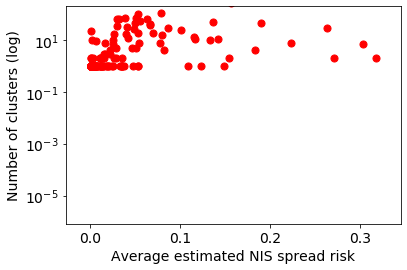

In [29]:
regions_ship=risk_mean(shipping_net_region)
realm_b=region_risk(b_final_cluster,'MEOW_region',hon_risks_b)
realm_b_info=get_region_info(realm_b)


plot_factors_correlation(get_factors(realm_b_info,'Risk'),get_factors(realm_b_info,'N_clusters'),
                         
                         "Average estimated NIS spread risk","Number of clusters (log)",'r',
                         "corr_clusters_invasion")




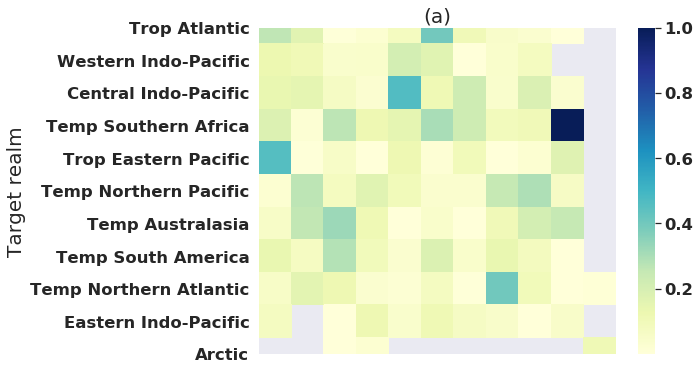

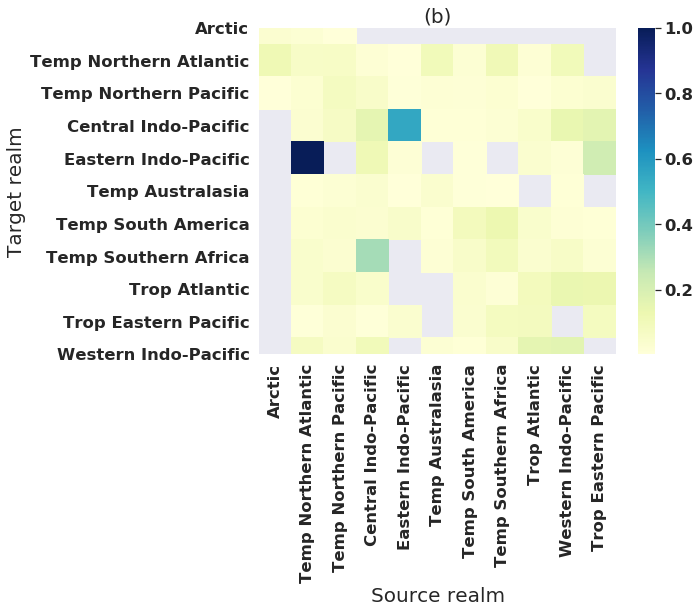

In [39]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
#sns..set_style("YlGnBu")
%matplotlib inline
fontsize=20
df=pd.DataFrame.from_dict(realm_adjlist_b ,orient='index').transpose()
plt.rc('font', weight='bold')
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
b=sns.heatmap(df, annot=False,xticklabels=[],cmap="YlGnBu")
plt.title('(a)',y=-0.1,fontsize=fontsize)
plt.ylabel('Target realm',fontsize=fontsize)#;plt.xlabel('Targte realm')
plt.savefig("data/figs/realm_b_flows.png",dpi = 300,bbox_inches='tight')
plt.show()
sns.set_palette("YlGnBu")


df=pd.DataFrame.from_dict(realm_adjlist_f ,orient='index').transpose()
plt.rc('font', weight='bold')
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
b=sns.heatmap(df, annot=False,cmap="YlGnBu")
plt.title('(b)',y=-0.7,fontsize=fontsize)
plt.ylabel('Target realm',fontsize=fontsize);plt.xlabel('Source realm',fontsize=fontsize)
plt.savefig("data/figs/realm_f_flows.png",dpi = 300,bbox_inches='tight')
plt.show()
sns.set_palette("YlGnBu")



### Identifying realms with most flow to each other

In [28]:
for key in realm_adjlist.keys(): 
    maxim=max((realm_adjlist[key].values()))
    val_to_key=dict((v,k) for k, v in realm_adjlist[key].items())
    print(key,'&',val_to_key[maxim], '&',maxim)
   # print(realm_adjlist[key])
   # print()

NameError: name 'realm_adjlist' is not defined

203
pearson r value:  0.263759523717 pearson p value:  0.000619073225716


/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


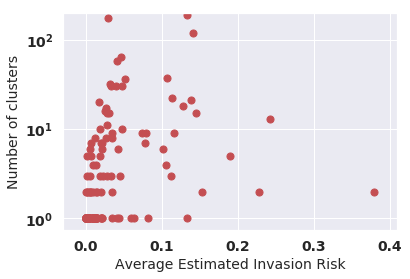

error: 1100
pearson r value:  nan pearson p value:  nan


/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


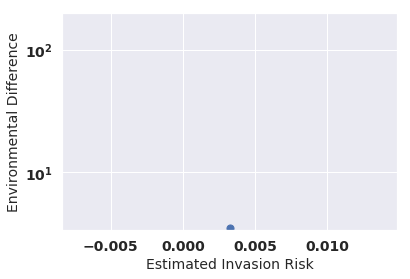

pearson r value:  nan pearson p value:  nan


/afs/crc.nd.edu/user/m/msaebi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


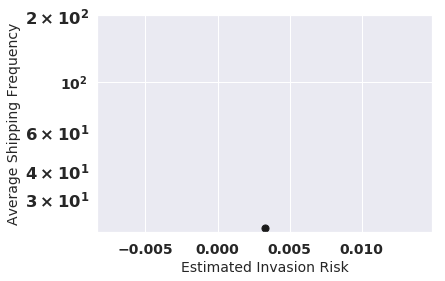

In [29]:
regions_ship=risk_mean(shipping_net_region)
realm_b=region_risk(b_final_cluster,'MEOW_region',hon_risks_b)
realm_b_info=get_region_info(realm_b)


plot_factors_correlation(get_factors(realm_b_info,'Risk'),get_factors(realm_b_info,'N_clusters'),
                         
                         "Average Estimated Invasion Risk","Number of clusters",'r',
                         "corr_clusters_invasion")


pair_info=pair_region_info(realm_b_info,region_adjlist,shipping_net_region)

env=get_factors(pair_info,'env')
pair_risk=get_factors(pair_info,'pair_risk')
clus=get_factors(pair_info,'clusters')
dist=get_factors(pair_info,'distance')
shipping=get_factors(pair_info,'shipping')

plot_factors_correlation(pair_risk,env,"Estimated Invasion Risk","Environmental Difference",'b',
                        "corr_env_invasion")

plot_factors_correlation(pair_risk,shipping,"Estimated Invasion Risk","Average Shipping Frequency",'k',
                        "Correlation of number of shipping frequency and Invasion risk for pairs of regions in Ballast")

## Not Used

In [ ]:
with open(regional_risk,'w') as g:
    g.write(', '.join(map(str, head)))
    for key,val in realms.items():
        for item in val:
            l=key +','+','.join(map(str, item))+'\n'
            g.write(l)
            
for key in realms.keys():
            print(len(realms[key]))

    

In [138]:
regional_risk='data/'+y+param1+'_regional_agg_risks_hon_env_'+str(year)+'_5.csv'
head=['MEOW_realm','name','number_of_clusters','risk','MEOW_province','country','\n']

realms=defaultdict(list)



for key,val in final_cluster.items():
    if ((len(val)>10)and(hon_risks_b[key]>0.9999)):
        a=[ports[str(key)]['NAME'],len(val),hon_risks_b[key],
                               ports[str(key)]['MEOW_province'],
                              ports[str(key)]['COUNTRY_CODE']]
        #l=', '.join(map(str, a))
        realms[ports[str(key)]['MEOW_realm']].append(a)

with open(regional_risk,'w') as g:
    g.write(', '.join(map(str, head)))
    for key,val in realms.items():
        for item in val:
            l=key +','+','.join(map(str, item))+'\n'
            g.write(l)
            
for key in realms.keys():
            print(len(realms[key]))

    

41
60
76
53
36
28
14
2
4
17


In [80]:
#print 10 major clusters with names
for key,val in sorted(b_O_freq_clusters.items())[0:25]:
    for item in val.items():
        print( str(ports[str(item[0])]['NAME']))
        #print([ports[str(item[0])]['NAME'],ports[str(item[0])]['FEOW_region'],ports[str(item[0])]['MEOW_region']])



Cape Finisterre
Santa Marta
Singapore
Gibraltar
Seattle
Port Kembla
Tarifa
Istanbul
Port Hedland
Lianyungang
Sarnia
Albany(AUS)
Algeciras
Lisbon
Richards Bay
Visakhapatnam
Yokohama
Paradip
Thursday Is.
Port Said
Hong Kong
Mumbai
Piraeus
Dampier
Port Klang
